# Deep Learning Homework 4

-------------------------------


**Name:** WU Zhi

**SN:** Your Student Number

-----------------------------------


**Start date:** *13th March 2018*

**Due date:** *29th March 2018, 11:55 pm*

------------------------------------

## How to Submit

When you have completed the exercises and everything has finsihed running, click on 'File' in the menu-bar and then 'Download .ipynb'. This file must be submitted to Moodle named as **studentnumber_DL_hw4.ipynb** before the deadline above.

Also send a **sharable link** to the notebook at the following email: ucl.coursework.submit@gmail.com. You can also make it sharable via link to everyone, up to you.

Please compile all results, all plots/figures and all answers to the understanding/analysis results questions into a PDF. Name convention: **studentnumber_DL_hw4.pdf**. Do not include any of the code (we will use the notebook for that). 

**Page limit: 15 pg **.

------------------------------------

## PART 1: MNIST as a sequence (follow-up from last assignment)
In this assignment we will be using the [MNIST digit dataset](https://yann.lecun.com/exdb/mnist/). The dataset contains images of hand-written digits ($0-9$), and the corresponding labels. The images have a resolution of $28\times 28$ pixels. This is the same dataset as in Assignment 1, but we will be using this data a bit differently this time around. Since this assignment will be focusing on recurrent networks that model sequential data, we will be looking at each image as a sequence: the networks you train will be "reading" the image one row at a time, from top to bottom (we could even do pixel-by-pixel, but in the interest of time we'll do row-by-row which is faster).  Also, we will work with a binarized version of MNIST -- we constrain the values of the pixels to be either $0$ or $1$. You can do this by applying the method `binarize`, defined below, to the raw images.

<img src="https://github.com/bodono/files/blob/master/mnist_as_sequence.png?raw=true">

* We take the MNIST images, binarise them, and interpret them as a sequence of pixels from top-left to bottom-right. ("Task 2" refers to the next homework, wherein you will be using the sequence for pixel prediction).

## Recurrent Models for MNIST

As discussed in the lectures, there are various ways and tasks for which we can use recurrent models. A depiction of the most common scenarios is available in the Figure below. In this assignment and the following one we will look at two of these forms: **many-to-one** (sequence to label/decision) and the **many-to-many** scenario where the model receives an input and produces an output at every time step. You will use these to solve the following tasks: i) pixel prediction  and ii) in-painting.

<img src="https://github.com/bodono/files/blob/master/rnn_models.png?raw=true">
* ([Figure adapted from Karpathy's The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness)). You will be implementing variants of *many-to-one* for classification (in this homework), and *many-to-many* for prediction (in the next homework).


## Task 1: (Next) Pixel prediction (35 pts)
In this part, you will train a **many-to-many** recurrent model: at each time $t$, the model receives as input a pixel value $x_t$ and tries to predict the next pixel in the images $x_{t+1}$ based on the current input and the recurrent state. Thus, your output function is now a probability over the value of pixel $x_{t+1}$ -- which can be either $0$ or $1$ (black or white).
\begin{equation}
    \hat{p}(x_{t+1}|x_{1:t}) = g(x_{t}, h_{t}, c_{t})
\end{equation}
Once we get to observe the actual value of $x_{t+1}$ at the next time-step, we can compute the cross-entropy between our predicted probability $\hat{p}(x_{t+1}|x_{1:t})$ and the observed value (pixel in the image). We can (and will) do that for every time-step prediction within a sequence. This will provide us with the training signal for optimizing the parameters of the mapping $g$ and the recurrent connections -- remember these are shared!, they do not change with $t$.





### Optimization
Use the Adam optimizer (with default settings other than the learning rate) for training.

**[Optional]** Sometimes dropout has been shown to be beneficial in training recurrent models, so feel free to use it or any other form of regularization that seems to improve performance. It might be also worth trying out batch-normalization. [Reference](https://arxiv.org/pdf/1603.09025.pdf).

### Models: Your models will have the following structure:
1. [(Red Block)] The *input* (current binarised row of pixels) can be fed directly into the recurrent connection without  much further pre-processing.
2. [(Blue Block)] The *output* (probabilities over the activation of the pixel) is produced by looking at the last output of the recurrent units, transforming them via an affine transformation.
3. [(Green Block)] For the *recurrent* part of the network, please implement and compare the following architectures:
    * LSTM with 32 units. **[15 pts]**
    
    **OR**
    
    * GRU with 32 units. **[15 pts]**

Your network should look like:
\begin{equation}
\textrm{Input} \Rightarrow \textrm{RNN cell} \Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Output}
\end{equation}
You might find the function `tf.nn.dynamic_rnn` useful.

### Hyper-parameters 
For all cases train the model with these hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.001, *batch_size*=256, *fully_connected_hidden_units=64*

With these hyper-parameters you should give you a good perfomance on both GRUs/LSTMs. It is worth noting that in $5$ epochs the model has yet converged, but in the interest of time (the training should have $\approx$ 1h). That being said, feel free to try other settings, there are certainly better choices, but please report the results with these exact hyper-parameters and/or train for longer -- the models should still improve (convergence is achieved around 25-30 epochs). 

### Tasks:

1) Implement and train the previously described model (choose either GRU **or** LSTM). Please report the *cross-entropy* on the *test set* and *training set* of the models trained. Use the `plot_summary_table` method below to format the table. Provide the learning curves (both training and testing loss) -- choose appropiate reporting interval here (at least 20 points).

2) Using the previously trained model, visualize the 1-step predictions, 10-step predictions, one row prediction (28 steps) and filling out the image (fill out all the pixels using the recurrent model). 

*   **Generate a small in-painting dataset.** Sample $100$ images from your test set. Mask/Remove the last $300$ pixels (roughly 10 rows and a half).

*   **Predict missing parts and compare with GT**. Given the above generated partial sequences as input to your train models, generate the continuation of these masked images (for the next 1, 10, 28, 300 pixels).
Report the cross-entropy of your in-paintings for the trained model at beginning of training(0 epochs), after 1 epoch and at the end of training. Discuss the results: contrasting long/short time prediction; compare these with the cross-entropy of the ground truth images. For multiple steps in-paintings, average the loss over $10$ samples. **[10 pts]**

*   **Visualize completing the image**. Pick out $3$ examples from your in-painting dataset to visualize  the resulting images -- this can be done at random, but should include *a successful example, failure example and one that displays high variance between samples.* For each example picked, please provide $5$ samples for the last three scenarios (10, 28, 300 pixels) and $1$ for the 1-pixel prediction -- total 16 samples/exampls. The samples should be generated recursively by sampling the generative process provided by the trained recurrent connections. Total number of in-painting to report: 16 samples x 3 examples = 48 **[10 pts]**



## Task 2: Using pixel-to-pixel: In-painting task (25 pts)

Using the models trained in the previous section, please in-paint the missing pixels in the following datasets:
* [One-pixel missing](https://github.com/dianaborsa/compgi22_dl_cw4/blob/master/one_pixel_inpainting.npy)
* [Window of 2x2 pixels missing](https://github.com/dianaborsa/compgi22_dl_cw4/blob/master/2X2_pixels_inpainting.npy)

This is similar to Task 1.b, but now you have information not only about the past(previous pixels in the image) but also future (pixels that come after your predictive target)

### Results
1) Provide the formula used to compute the probability over the missing pixel and respectively for the missing patch **[5+5 pts]**

#### Missing pixel:

Assuming $x_{miss}$ is the missing pixel, and $P(x_{miss})$ is the probability calculated by trained model (Based on previous pixels). $x_1, x_2, x_3 ... x_n$ is the future pixels.


$$
P(x_{miss}|x_1, x_2, x_3 ... x_n)  = \frac{P(x_1, x_2, x_3 ... x_n | x_{miss}) . p(x_{miss})}{p(x_1, x_2, x_3 ... x_n)}
$$

And Likelihood is: 
  
$$
\begin{align}
P(x_1, x_2, x_3 ... x_n | x_{miss}) &= P(x_1 | x_{miss}).P(x_2, x_3 ... x_n|x_1, x_{missing}) \\ 
&= P(x_1 | x_{miss}).P(x_2 |x_1, x_{miss}).P(x_3 ... x_n|x_1, x_{missing}) \\
& = P(x_1 | x_{miss}).P(x_2 |x_1, x_{miss})\cdots P(x_n|x_{missing}, x_1, x_2 \cdots x_{n-1})
\end{align}
$$

So, when likelihood is maximum likelihood estimation, the probability of missing pixel is the most probable.  

#### Missing patch:

For a $2\times2$ missing patch in $28\times28$, assuming the missing pixels are $x_m$, $x_{m+1}$, $x_{m+2}$ and $x_{m+3}$.

For $x_m$, we can use the previous method (the method in missing pixel) to calculate the most probable (0 or 1).

$$
P(x_{m}|x_1, x_2, x_3 ... x_n)  = \frac{P(x_1, x_2, x_3 ... x_n | x_{m}) . p(x_{m})}{p(x_1, x_2, x_3 ... x_n)}
$$

However the future points here are exclusive of $x_{m+1}$, $x_{m+2}$ and $x_{m+3}$, beacause we do not know the actual pixel values of them.

The likelihood here is:

$$
\begin{align}
P(x_1, x_2, x_3 ... x_n | x_m) &= P(x_1 | x_m).P(x_2, x_3 ... x_n|x_1, x_m) \\ 
&= P(x_1 | x_m).P(x_2 |x_1, x_m).P(x_3 ... x_n|x_1, x_m) \\
& = P(x_1 | x_m).P(x_2 |x_1, x_m)\cdots P(x_n|x_m, x_1, x_2 \cdots x_{n-1})
\end{align}
$$

The pixel value of $x_m$ should be 1 or 0, so we need to calculate the most probable probability $P(x_{m}=1|x_1, x_2, x_3 ... x_n)$ and $P(x_{m}=0|x_1, x_2, x_3 ... x_n)$, and we choose the higher probability between $P(x_{m}=1|x_1, x_2, x_3 ... x_n)$ and $P(x_{m}=0|x_1, x_2, x_3 ... x_n)$ to predict $x_m$ value.

After calcuating $x_m$, we can use trained model based previous pixel value and $x_m$ to calculate $P(x_{m+1})$, and the pixel prediction of $x_{m+1}$ can be calculated by the same way as $x_m$, but the future pixels for $x_{m+1}$ are exclusive of $x_{m+2}$ and $x_{m+3}$.

When we use same method to predict $x_{m+2}$, the future pixels for $x_{m+1}$ are exclusive of $x_{m+3}$. Affer we predict $x_m, x_{m+1}$ and $x_{m+2}$, we can use method of missing pixel to predict it.


\\
2) Visualize the most probable in-painting, according to your model. How does this compare to the ground truth? (Compare cross-entropy between your most probable sample and the ground truth). Explain the difference. It is enough to include just one example per task/dataset. **[10 pts]**


### In-painting data 

We provide two datasets (one corresponing to the one-pixel in-painting tasks and the other one with a 2x2 patch missing). The datasets are available on [git](https://github.com/dianaborsa/compgi22_dl_cw4/blob/master/). Links are available in the description and code is provide below to load the dataset and visualize. Both datasets have 1000 sampled images from MNIST(test). Both dataset sets have the same simple structure: cropped images and their ground truth (GT). in this second task, you will consider the copped images and use your pixel-to-pixel model, try to predict the missing pixel/patches.


# Imports and utility functions (do not modify!)

In [0]:
#@title Import libraries
#@test {"output": "ignore"}

# Import useful libraries.
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

# Binarize the images
def binarize(images, threshold=0.1):
  return (threshold < images).astype('float32')

# Import dataset with one-hot encoding of the class labels.
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders to feed train and test data into the graph.
# Since batch dimension is 'None', we can reuse them both for train and eval.
def get_placeholders():
  x = tf.placeholder(tf.float32, [None, 783])
  y = tf.placeholder(tf.float32, [None, 783])
  return x, y

def get_placeholders2():
  x = tf.placeholder(tf.float32, [None, 484])
  y = tf.placeholder(tf.float32, [None, 300])
  return x, y

# Generate summary table of results. This function expects a dict with the
# following structure: keys of 'LSTM' (or 'GRU') and the values for each key are a
# list of tuples consisting of (test_loss, test_accuracy), and the list is
# ordered as the results from 0 epoch (beginning of training), 1 epoch, 5 epochs (or end of training):
# {
#  'LSTM': [(loss,acc), (loss, acc), (loss, acc)]
# }
def plot_summary_table(experiment_results):
  # Fill Data.
  cell_text = []
  columns = ['(Beginning - 0 epochs)', '(Mid-training - 1 epoch)', '(End of training - 5 epochs)']
  for k, v in experiment_results.iteritems():
    rows = ['Test loss', 'Test accuracy']
    cell_text=[[],[]]
    for (l, _) in v:
      cell_text[0].append(str(l))
    for (_, a) in v:
      cell_text[1].append(str(a))

    fig=plt.figure(frameon=False)
    ax = plt.gca()
    the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
    the_table.scale(2, 8)
    # Prettify.
    ax.patch.set_facecolor('None')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.text(-0.73, 0.9, k, fontsize=18)
    
    
    
def plot_learning_curves(training_loss, testing_loss):
  plt.figure()
  plt.plot(training_loss)
  plt.plot(testing_loss, 'g')
  plt.legend(['Training loss', 'Testing loss'])
   

# Train Models

Generate summary table of results. This function expects a dict with the
following structure: keys of 'LSTM' (or 'GRU') and the values for each key are a
list of tuples consisting of (test_loss, test_accuracy), and the list is
ordered as the results from 0 epoch (beginning of training), 1 epoch, 5 epochs (or end of training) i.e. expected dictionary (final performace only):

```python
{
  'LSTM': [(loss,acc), (loss, acc), (loss, acc)]
}
```

In [0]:
#@title Your models
# Advisable to you GPU for this part

experiments_result = []
with tf.device('/device:GPU:*'):

  tf.reset_default_graph()
  num_epochs = 5
  learning_rate = 0.001
  batch_size = 256 
  num_hidden_unit = 32
  num_classes = 1
  fully_connected_hidden_units = 64

  mnist = get_data()
  eval_mnist = get_data()

  x, y_ = get_placeholders()
  x_reshape = tf.reshape(x, [-1, 28*28-1, 1])
  y_reshape = tf.reshape(y_, [-1, 28*28-1])

  initializer = tf.contrib.layers.xavier_initializer()
  time_steps = 28*28-1
  num_units = 1


  # LSTM
  RNN_layers = [tf.nn.rnn_cell.LSTMCell(size) for size in [num_hidden_unit]]
  
  multi_rnn_cell = tf.nn.rnn_cell.MultiRNNCell(RNN_layers)
  lstm_outputs, state = tf.nn.dynamic_rnn(multi_rnn_cell, x_reshape, dtype=tf.float32) # lstm_output: bs * 783 * 32
  # lstm_outputs = tf.unstack(lstm_outputs, time_steps, 1)[-1] # lstm_output: bs * 32

  lstm_outputs = tf.reshape(lstm_outputs, [-1, num_hidden_unit]) # lstm_output:(bs*783, 32)

  W_1 = tf.Variable(initializer([num_hidden_unit, fully_connected_hidden_units]))
  b_1 = tf.Variable(initializer([fully_connected_hidden_units]))
  hid_1 = tf.matmul(tf.nn.relu(lstm_outputs), W_1) + b_1 # hid_1:(bs*783, 64)

  W_2 = tf.Variable(initializer([fully_connected_hidden_units, num_classes]))
  b_2 = tf.Variable(initializer([num_classes]))
  y = tf.matmul(tf.nn.relu(hid_1), W_2) + b_2 # y:(bs*783, 1)

  y = tf.reshape(y, [-1, time_steps]) # y:(bs, 783)

  # loss
  cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y_, logits = y))

  # update
  train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

  # evaluation metric 
  correct_prediction = tf.equal(tf.cast(y > 0.1, y.dtype), y_reshape)
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

  i, train_accuracy, test_accuracy = 0, [], []
  train_loss, test_loss = [], []
  init = tf.global_variables_initializer()

  with tf.Session() as sess:
    sess.run(init)
    while mnist.train.epochs_completed < num_epochs:

      i += 1
      batch_xs, _ = mnist.train.next_batch(batch_size)
      batch_ys = batch_xs[:, 1:]
      batch_xs = batch_xs[:, 0:-1]                        
      sess.run(train_step, feed_dict = {x: binarize(batch_xs), y_: binarize(batch_ys)})
      
      saver = tf.train.Saver()
      if i == 1:
        save_path = saver.save(sess, "model_DL4/model1.ckpt")
        print("Model Epoch 0 saved in path: %s" % save_path)  

      if i == 215:
        save_path = saver.save(sess, "model_DL4/model2.ckpt")
        print("Model Epoch 1 saved in path: %s" % save_path)

      if i == 1075:
        save_path = saver.save(sess, "model_DL4/model3.ckpt")
        print("Model Epoch 5 saved in path: %s" % save_path)

      if i % (25) == 0:

        #####################################
        # Compute and store train accuracy. #
        batch_train, _ = eval_mnist.train.next_batch(11000)
        trainAccuracy = sess.run(accuracy, feed_dict={x: binarize(batch_train[:,0:-1]), y_: binarize(batch_train[:,1:])})
        train_accuracy.append(trainAccuracy)
        
        # Compute and store train loss. #        
        loss1 = sess.run(cross_entropy, feed_dict={x: binarize(batch_train[:,0:-1]), y_: binarize(batch_train[:,1:])})
        train_loss.append(loss1)
        
        #####################################
        
        #####################################
        # Compute and store test accuracy.  #
        batch_test = eval_mnist.test.images
        testAccuracy = sess.run(accuracy, feed_dict={x: binarize(batch_test[:,:-1]), y_: binarize(batch_test[:,1:])})
        test_accuracy.append(testAccuracy)
        
        # Compute and store test loss. #
        test_data = eval_mnist.test.images
        loss2 = sess.run(cross_entropy, feed_dict={x: binarize(test_data[:,0:-1]), y_: binarize(test_data[:,1:])})
        test_loss.append(loss2)
        
        #####################################
        print(mnist.train.epochs_completed, i, 'test accuracy:',testAccuracy, 'train loss:', loss1, "test loss:", loss2 )
    
    experiments_result.append(( test_accuracy, train_loss, test_loss))




In [14]:
cd model_DL4

[Errno 2] No such file or directory: 'model_DL4'
/content


In [0]:
from google.colab import files
files.download( "model1.ckpt.meta" ) 

In [29]:
#@title Training
#@test {"output": "ignore"}
print(np.array(test_accuracy).T)
print(np.array(train_loss).T)
print(np.array(test_loss).T)

[0.787116   0.8177673  0.8177673  0.8190445  0.8190445  0.8190445
 0.82032156 0.8754686  0.91132414 0.9222139  0.92766076 0.9312156
 0.9326493  0.9341282  0.9356305  0.9367235  0.937857   0.93883854
 0.94092757 0.9403387  0.9414849  0.9409512  0.9421598  0.941969
 0.94229734 0.9421466  0.94237906 0.9422014  0.94339436 0.94334495
 0.9430843  0.9434858  0.94344586 0.9434073  0.944176   0.9433255
 0.94511074 0.9453723  0.9441018  0.94404775 0.9446875  0.94434047
 0.94286746]
[0.6686769  0.46813914 0.45378345 0.43967602 0.41491732 0.3778404
 0.3347579  0.29294038 0.2441914  0.21595365 0.19792399 0.18565418
 0.1780377  0.17212872 0.16768147 0.16387872 0.16064748 0.1570438
 0.15483995 0.15379226 0.15003808 0.14869729 0.14719899 0.14785615
 0.146011   0.14422907 0.14278059 0.14548223 0.14068814 0.14005867
 0.13952263 0.13875005 0.14072631 0.13771576 0.13728575 0.13572958
 0.13790537 0.13500762 0.13551241 0.13421595 0.13529824 0.13413604
 0.13476706]
[0.66882485 0.47123203 0.45547488 0.4415459

#Results

## LSTM result


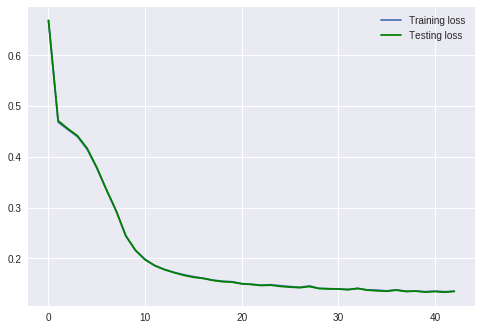

In [34]:
plot_learning_curves(experiments_result[0][1],experiments_result[0][2])

In [0]:
LSTM_experiment_results =  {'LSTM': [(experiments_result[0][2][0],experiments_result[0][0][0]), 
                                     (experiments_result[0][2][12],experiments_result[0][0][12]), 
                                     (experiments_result[0][2][-1],experiments_result[0][0][-1])]}
GRU_experiment_results =  {'GRU': [(1.1210192, 0.175847), 
                                   (0.23100725, 0.9320999),
                                   (0.13256024, 0.9470945)]}

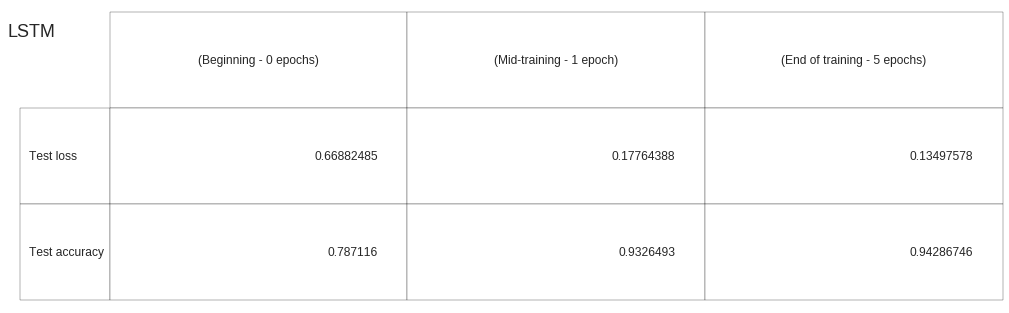

In [48]:
plot_summary_table(LSTM_experiment_results)

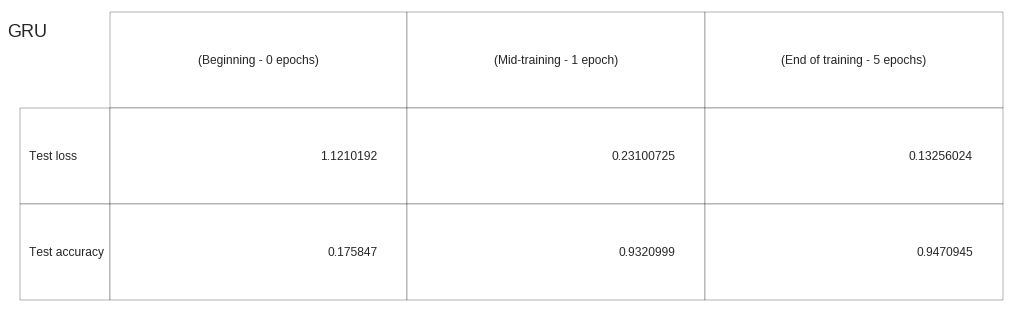

In [49]:
plot_summary_table(GRU_experiment_results)

# Pixel prediction

### Generate a small in-painting dataset.
Sample $100$ images from your test set. Mask/Remove the last $300$ pixels (roughly 10 rows and a half).

In [0]:
#Sample 100 images + mask 
import random 
def sample100images(): 
  eval_mnist = get_data()
  #print(eval_mnist.test.images.shape[0])
  sample_index = random.sample(range(0,eval_mnist.test.images.shape[0]),100)
  sample100 = []
  real_pixels = []
  image100 = []
  for i in sample_index:
    image100.append(binarize(eval_mnist.test.images[i]))
    sample100.append(binarize(eval_mnist.test.images[i][0:-300]))
    real_pixels.append(binarize(eval_mnist.test.images[i][-300:]))
  return sample100, real_pixels, image100

In [103]:
sample100, real_pixels, image100 = sample100images()
print(len(sample100))
print(sample100[0].shape)
print(len(real_pixels))
print(real_pixels[0].shape)
print(len(image100))
print(image100[0].shape)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
100
(484,)
100
(300,)
100
(784,)


### Predict missing parts and compare with the ground truth. 
Given the above generated partial sequences as input to your train models, generate the continuation of these masked images (for the next 1, 10, 28, 300 pixels).

In [65]:
# upload trained model from local 
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
   print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving model1.ckpt.data-00000-of-00001 to model1.ckpt.data-00000-of-00001
Saving model1.ckpt.index to model1.ckpt.index
Saving model1.ckpt.meta to model1.ckpt.meta
Saving model2.ckpt.data-00000-of-00001 to model2.ckpt.data-00000-of-00001
Saving model2.ckpt.index to model2.ckpt.index
Saving model2.ckpt.meta to model2.ckpt.meta
Saving model3.ckpt.data-00000-of-00001 to model3.ckpt.data-00000-of-00001
Saving model3.ckpt.index to model3.ckpt.index
Saving model3.ckpt.meta to model3.ckpt.meta
User uploaded file "model3.ckpt.data-00000-of-00001" with length 78356 bytes
User uploaded file "model1.ckpt.index" with length 752 bytes
User uploaded file "model1.ckpt.meta" with length 182334 bytes
User uploaded file "model2.ckpt.meta" with length 244350 bytes
User uploaded file "model3.ckpt.index" with length 752 bytes
User uploaded file "model3.ckpt.meta" with length 488233 bytes
User uploaded file "model2.ckpt.data-00000-of-00001" with length 78356 bytes
User uploaded file "model2.ckpt.index" with

In [104]:
!ls

datalab				 model2.ckpt.index
MNIST_data			 model2.ckpt.meta
model1.ckpt.data-00000-of-00001  model3.ckpt.data-00000-of-00001
model1.ckpt.index		 model3.ckpt.index
model1.ckpt.meta		 model3.ckpt.meta
model2.ckpt.data-00000-of-00001  model_DL4


In [0]:
loss_ten = []
image = []

In [30]:
#Use the model for predictions and compare log likelihood

sample100, real_pixels, image100 = sample100images()
with tf.device('/device:GPU:*'):

  tf.reset_default_graph()
  num_epochs = 2
  learning_rate = 0.001
  batch_size = 256 
  num_hidden_unit = 32
  num_classes = 1
  fully_connected_hidden_units = 64
  initializer = tf.contrib.layers.xavier_initializer()
  mnist = get_data()
  eval_mnist = get_data()

  x, y_ = get_placeholders()
  x_reshape = tf.reshape(x, [-1, 28*28-1, 1])
  y_ = tf.reshape(y_, [-1, 28*28-1])

  time_steps = 28*28-1
  num_units = 1

  # LSTM
  RNN_layers = [tf.nn.rnn_cell.LSTMCell(size) for size in [num_hidden_unit]]

  multi_rnn_cell = tf.nn.rnn_cell.MultiRNNCell(RNN_layers)
  lstm_outputs, state = tf.nn.dynamic_rnn(multi_rnn_cell, x_reshape, dtype=tf.float32) # lstm_output: bs * 783 * 32

  lstm_outputs = tf.reshape(lstm_outputs, [-1, num_hidden_unit]) # lstm_output:(bs*783, 32)

  W_1 = tf.Variable(initializer([num_hidden_unit, fully_connected_hidden_units]))
  b_1 = tf.Variable(initializer([fully_connected_hidden_units]))
  hid_1 = tf.matmul(tf.nn.relu(lstm_outputs), W_1) + b_1 # hid_1:(bs*783, 64)

  W_2 = tf.Variable(initializer([fully_connected_hidden_units, num_classes]))
  b_2 = tf.Variable(initializer([num_classes]))
  y = tf.matmul(tf.nn.relu(hid_1), W_2) + b_2 # y:(bs*783, 1)

  y = tf.reshape(y, [-1, time_steps]) # y:(bs, 783)

  x_test, y_test = get_placeholders2()
  current = x_test
  y_test = tf.reshape(y_test, [-1, 300])
  for i in range(300):
    current = tf.reshape(current, [-1, 484 + i, 1])

    outputs_t, _ = tf.nn.dynamic_rnn(multi_rnn_cell, current, dtype=tf.float32)
    rnn_outputs_t = outputs_t[:, -1, :]   #batch_size * 1 * num_hidden
    rnn_outputs_t = tf.reshape(rnn_outputs_t, [-1, num_hidden_unit])
    A0_t = tf.nn.relu(rnn_outputs_t)
    A1_t = tf.nn.relu(tf.matmul(A0_t, W_1) + b_1)
    A2_t = tf.sigmoid(tf.matmul(A1_t, W_2) + b_2)
    current = tf.reshape(current, [-1, 484 + i])

    # uniform rand 
#     random_ = tf.random_uniform((100, 1), minval=0, maxval=1,dtype=tf.float32)
    random_ = tf.reshape(tf.reduce_mean(tf.random_uniform((100, 10), minval=0, maxval=1,dtype=tf.float32), 1), [100, 1])

    result = A2_t - random_

    result = tf.cast(result>0, result.dtype)
    current = tf.concat([current, result],1)

  pixels = current  
  total = []
  predict_loss1 = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y_test[:,0], logits = pixels[:,-300]))
  predict_loss10 = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y_test[:,0:10], logits = pixels[:,-300:-290]))
  predict_loss28 = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y_test[:,0:28], logits = pixels[:,-300:-272]))
  predict_loss300 = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y_test, logits = pixels[:,-300:]))  

  total.append([predict_loss1, predict_loss10, predict_loss28, predict_loss300, pixels])
  init = tf.global_variables_initializer()
  with tf.Session() as sess:
      sess.run(init)

      saver = tf.train.Saver()

      saver.restore(sess, "model1.ckpt")
      logloss_epochs0 = sess.run(total, feed_dict={x_test: sample100, y_test: real_pixels })   
      print('loss epochs0:', logloss_epochs0)

      saver.restore(sess, "model2.ckpt")
      logloss_epochs1 = sess.run(total, feed_dict={x_test: sample100, y_test: real_pixels })      
      print('loss epochs1:', logloss_epochs1)

      saver.restore(sess, "model3.ckpt")
      logloss_epochs5 = sess.run(total, feed_dict={x_test: sample100, y_test: real_pixels })      
      print('loss epochs5:', logloss_epochs5)

      loss_ten.append([logloss_epochs0, logloss_epochs1, logloss_epochs5])
      image.append(image100)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Restoring parameters from model1.ckpt
loss epochs0: [[0.93085945, 0.7946974, 1.0240359, 1.1336417, array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]], dtype=float32)]]
INFO:tensorflow:Restoring parameters from mod

### Save data

In [0]:
import pickle
 
output = open('loss13.pkl', 'wb')
 
# Pickle dictionary using protocol 0.
pickle.dump(loss_full, output)
output.close()

In [0]:
from google.colab import files
files.download( "loss13.pkl" ) 

### Upload data

In [11]:
# upload trained model from local 
import tensorflow as tf
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
   print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving model1.ckpt.data-00000-of-00001 to model1.ckpt.data-00000-of-00001
Saving model1.ckpt.index to model1.ckpt.index
Saving model1.ckpt.meta to model1.ckpt.meta
Saving model2.ckpt.data-00000-of-00001 to model2.ckpt.data-00000-of-00001
Saving model2.ckpt.index to model2.ckpt.index
Saving model2.ckpt.meta to model2.ckpt.meta
Saving model3.ckpt.data-00000-of-00001 to model3.ckpt.data-00000-of-00001
Saving model3.ckpt.index to model3.ckpt.index
Saving model3.ckpt.meta to model3.ckpt.meta
User uploaded file "model1.ckpt.data-00000-of-00001" with length 78356 bytes
User uploaded file "model1.ckpt.index" with length 752 bytes
User uploaded file "model1.ckpt.meta" with length 182334 bytes
User uploaded file "model2.ckpt.data-00000-of-00001" with length 78356 bytes
User uploaded file "model2.ckpt.index" with length 752 bytes
User uploaded file "model2.ckpt.meta" with length 244350 bytes
User uploaded file "model3.ckpt.data-00000-of-00001" with length 78356 bytes
User uploaded file "model3.ck

In [0]:
import pprint, pickle

pkl_file = open('image_t.pkl', 'rb')

data3 = pickle.load(pkl_file)
#pprint.pprint(data1)

#data2 = pickle.load(pkl_file)
#pprint.pprint(data2)

pkl_file.close()

In [12]:
!ls

compgi22_dl_cw4			 model2.ckpt.index
datalab				 model2.ckpt.meta
model1.ckpt.data-00000-of-00001  model3.ckpt.data-00000-of-00001
model1.ckpt.index		 model3.ckpt.index
model1.ckpt.meta		 model3.ckpt.meta
model2.ckpt.data-00000-of-00001


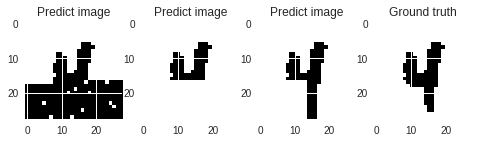

In [133]:
# good example: number 74

n = 74

image1 = np.reshape(loss_ten[0][2][0][4][n],(28,28))

plt.subplot(1,4,1)
plt.title('Predict image')
plt.imshow(np.reshape(loss_ten[0][0][0][4][n],(28,28)))

plt.subplot(1,4,2)
plt.title('Predict image')
plt.imshow(np.reshape(loss_ten[0][1][0][4][n],(28,28)))

plt.subplot(1,4,3)
plt.title('Predict image')
plt.imshow(image1)

image2 = np.reshape(image[0][n],(28,28))

plt.subplot(1,4,4)
plt.title('Ground truth')
plt.imshow(image2)

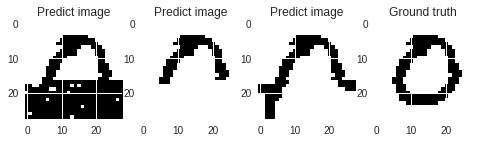

In [274]:
# bad example: number 6
n = 6

image1 = np.reshape(data1[0][2][0][4][n],(28,28))
plt.subplot(1,4,1)
plt.title('Predict image')
plt.imshow(np.reshape(data1[0][0][0][4][n],(28,28)))

plt.subplot(1,4,2)
plt.title('Predict image')
plt.imshow(np.reshape(data1[0][1][0][4][n],(28,28)))

plt.subplot(1,4,3)
plt.title('Predict image')
plt.imshow(image1)

image2 = np.reshape(data3[0][n],(28,28))
plt.subplot(1,4,4)
plt.title('Ground truth')
plt.imshow(image2)

In [134]:
len(data3[0])

100

### Visualize completing the image. 
Pick out $3$ examples from your in-painting dataset to visualize  the resulting images -- this can be done at random, but should include \textit{a successful example, failure example and one that displays high variance between samples.}

In [136]:
#Use the model for predictions and compare log likelihood
loss_full = []
sample100, real_pixels, image100 = sample100images()
with tf.device('/device:GPU:*'):

  for j in range(10):
    print(j)
    loss_ten = []
    tf.reset_default_graph()
    num_epochs = 2
    learning_rate = 0.001
    batch_size = 256 
    num_hidden_unit = 32
    num_classes = 1
    fully_connected_hidden_units = 64
    initializer = tf.contrib.layers.xavier_initializer()
    mnist = get_data()
    eval_mnist = get_data()

    x, y_ = get_placeholders()
    x_reshape = tf.reshape(x, [-1, 28*28-1, 1])
    y_ = tf.reshape(y_, [-1, 28*28-1])

    time_steps = 28*28-1
    num_units = 1

    # LSTM
    RNN_layers = [tf.nn.rnn_cell.LSTMCell(size) for size in [num_hidden_unit]]

    multi_rnn_cell = tf.nn.rnn_cell.MultiRNNCell(RNN_layers)
    lstm_outputs, state = tf.nn.dynamic_rnn(multi_rnn_cell, x_reshape, dtype=tf.float32) # lstm_output: bs * 783 * 32

    lstm_outputs = tf.reshape(lstm_outputs, [-1, num_hidden_unit]) # lstm_output:(bs*783, 32)

    W_1 = tf.Variable(initializer([num_hidden_unit, fully_connected_hidden_units]))
    b_1 = tf.Variable(initializer([fully_connected_hidden_units]))
    hid_1 = tf.matmul(tf.nn.relu(lstm_outputs), W_1) + b_1 # hid_1:(bs*783, 64)

    W_2 = tf.Variable(initializer([fully_connected_hidden_units, num_classes]))
    b_2 = tf.Variable(initializer([num_classes]))
    y = tf.matmul(tf.nn.relu(hid_1), W_2) + b_2 # y:(bs*783, 1)

    y = tf.reshape(y, [-1, time_steps]) # y:(bs, 783)

    x_test, y_test = get_placeholders2()
    current = x_test
    y_test = tf.reshape(y_test, [-1, 300])
    for i in range(300):
      current = tf.reshape(current, [-1, 484 + i, 1])

      outputs_t, _ = tf.nn.dynamic_rnn(multi_rnn_cell, current, dtype=tf.float32)
      rnn_outputs_t = outputs_t[:, -1, :]   #batch_size * 1 * num_hidden
      rnn_outputs_t = tf.reshape(rnn_outputs_t, [-1, num_hidden_unit])
      A0_t = tf.nn.relu(rnn_outputs_t)
      A1_t = tf.nn.relu(tf.matmul(A0_t, W_1) + b_1)
      A2_t = tf.sigmoid(tf.matmul(A1_t, W_2) + b_2)
      current = tf.reshape(current, [-1, 484 + i])

      # uniform rand 
  #     random_ = tf.random_uniform((100, 1), minval=0, maxval=1,dtype=tf.float32)
      random_ = tf.reshape(tf.reduce_mean(tf.random_uniform((100, 10), minval=0, maxval=1,dtype=tf.float32), 1), [100, 1])

      result = A2_t - random_

      result = tf.cast(result>0, result.dtype)
      current = tf.concat([current, result],1)

    pixels = current  
    total = []
    predict_loss1 = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y_test[:,0], logits = pixels[:,-300]))
    predict_loss10 = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y_test[:,0:10], logits = pixels[:,-300:-290]))
    predict_loss28 = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y_test[:,0:28], logits = pixels[:,-300:-272]))
    predict_loss300 = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y_test, logits = pixels[:,-300:]))  

    total.append([predict_loss1, predict_loss10, predict_loss28, predict_loss300, pixels])
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)

        saver = tf.train.Saver()

        saver.restore(sess, "model1.ckpt")
        logloss_epochs0 = sess.run(total, feed_dict={x_test: sample100, y_test: real_pixels })   
        print('loss epochs0:', logloss_epochs0)

        saver.restore(sess, "model2.ckpt")
        logloss_epochs1 = sess.run(total, feed_dict={x_test: sample100, y_test: real_pixels })      
        print('loss epochs1:', logloss_epochs1)

        saver.restore(sess, "model3.ckpt")
        logloss_epochs5 = sess.run(total, feed_dict={x_test: sample100, y_test: real_pixels })      
        print('loss epochs5:', logloss_epochs5)

        loss_ten.append([logloss_epochs0, logloss_epochs1, logloss_epochs5])
        loss_full.append(loss_ten) 
  image_full = image100


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Restoring parameters from model1.ckpt
loss epochs0: [[1.0608594, 0.8175578, 1.0513862, 1.1391549, array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.]], dtype=float32)]]
INFO:tensorflow:Restoring parameters from mo

loss epochs0: [[1.0546584, 0.81621695, 1.0512785, 1.1387336, array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]], dtype=float32)]]
INFO:tensorflow:Restoring parameters from model2.ckpt
loss epochs1: [[0.6285667, 0.6678293, 0.6838797, 0.6934172, array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)]]
INFO:tensorflow:Restoring parameters from model3.ckpt
loss epochs5: [[0.6333713, 0.61969584, 0.6583633, 0.70162255, array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 

loss epochs5: [[0.6309689, 0.62743896, 0.66009307, 0.7035792, array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)]]
9
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Restoring parameters from model1.ckpt
loss epochs0: [[1.056055, 0.8219377, 1.0524079, 1.1389031, array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0

In [0]:
#Visualize samples

### Good example

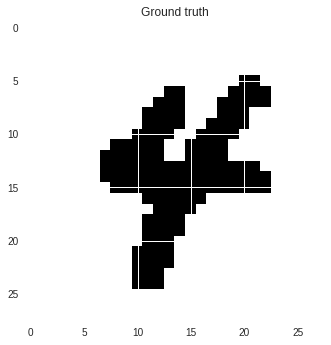

In [243]:
left10 = np.zeros((1,290)) 
left1 = np.zeros((1,299))  
left28 = np.zeros((1,272))  

n = 27

#image1 = np.reshape(loss_ten_full[0][2][0][4][n],(28,28))

image2 = np.reshape(image_full[n],(28,28))
 
plt.title('Ground truth')
plt.imshow(image2)

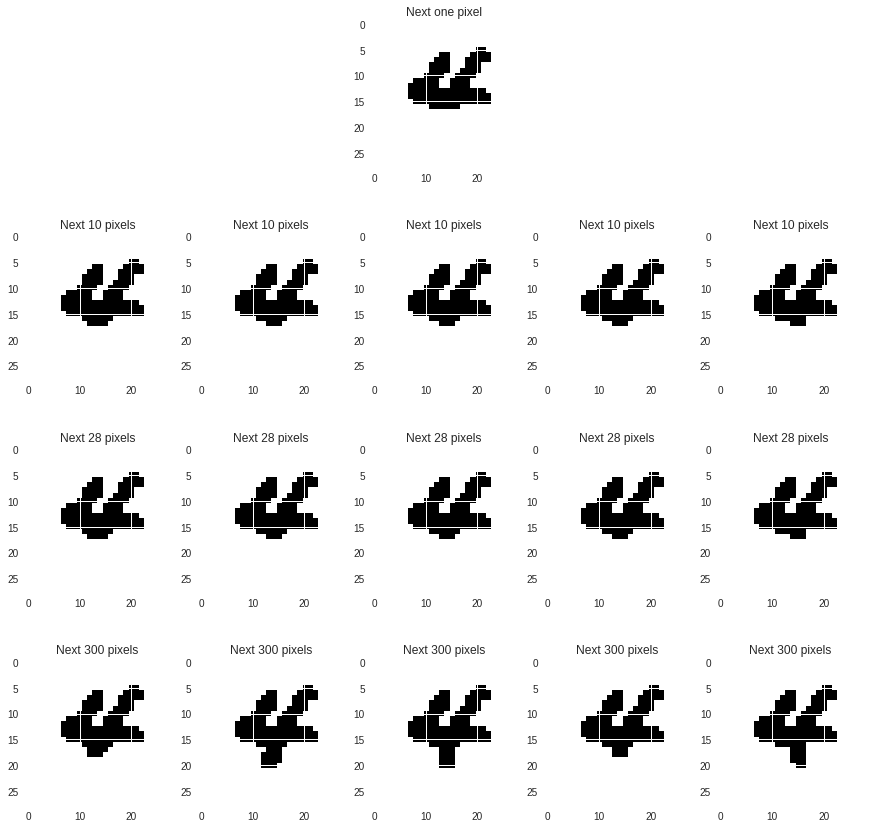

In [248]:

# random choose 5 sample
plt.figure(num='Comparison',figsize=(15,15))

choices = np.random.choice(range(9), 5,replace=False)
plt.subplot(4,5,3)
plt.title('Next one pixel')
pixels_1 = loss_full[choices[0]][0][2][0][4][n][0:-299]
plt.imshow(np.reshape(np.append(pixels_1, left1),(28,28)))

for i in range(3):
  for j in range(5):
    plt.subplot(4,5,i*5+j+6)
    if i == 0:
      plt.title('Next 10 pixels')    
      pixels_10 = loss_full[choices[j]][0][2][0][4][n][0:-290]
      plt.imshow(np.reshape(np.append(pixels_10, left10),(28,28)))
    if i == 1:
      plt.title('Next 28 pixels')
      pixels_28 = loss_full[choices[j]][0][2][0][4][n][0:-272]
      plt.imshow(np.reshape(np.append(pixels_28, left28),(28,28)))
 
    if i == 2:
      plt.title('Next 300 pixels')
      plt.imshow(np.reshape(loss_full[choices[j]][0][2][0][4][n],(28,28)))

### Bad exmaple

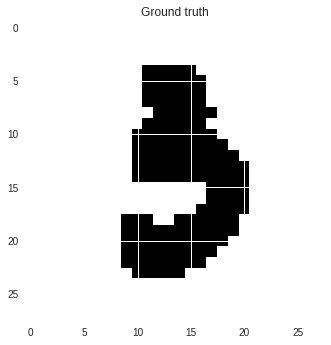

In [255]:
left10 = np.zeros((1,290)) 
left1 = np.zeros((1,299))  
left28 = np.zeros((1,272))  

n = 91

#image1 = np.reshape(loss_ten_full[0][2][0][4][n],(28,28))

image2 = np.reshape(image_full[n],(28,28))
 
plt.title('Ground truth')
plt.imshow(image2)

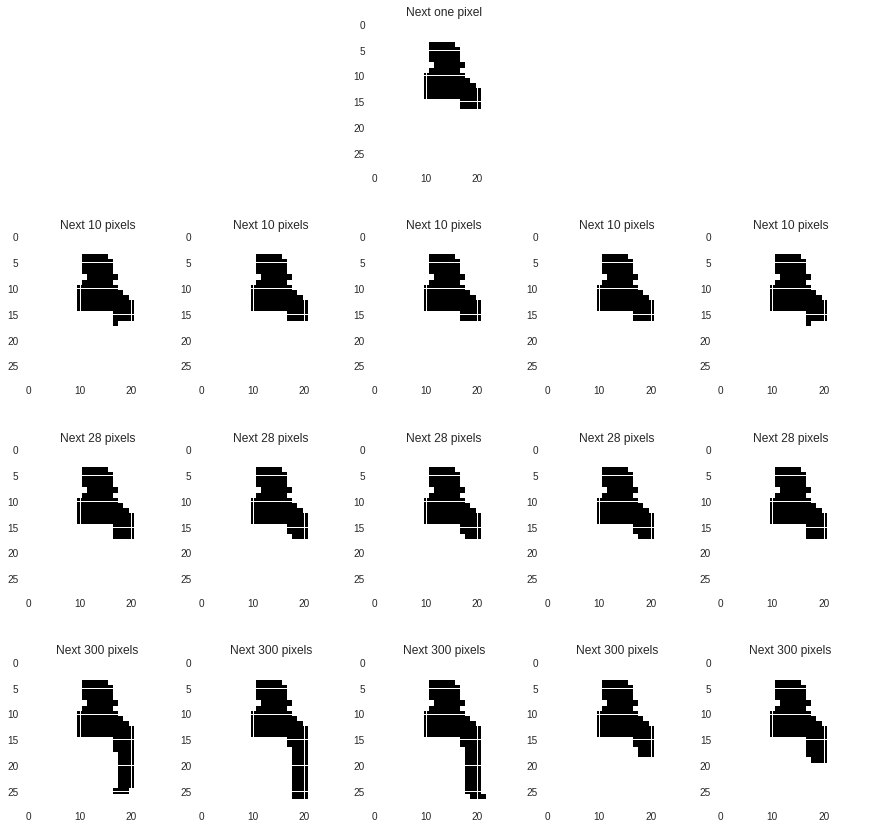

In [256]:

# random choose 5 sample
plt.figure(num='Comparison',figsize=(15,15))

choices = np.random.choice(range(9), 5,replace=False)
plt.subplot(4,5,3)
plt.title('Next one pixel')
pixels_1 = loss_full[choices[0]][0][2][0][4][n][0:-299]
plt.imshow(np.reshape(np.append(pixels_1, left1),(28,28)))

for i in range(3):
  for j in range(5):
    plt.subplot(4,5,i*5+j+6)
    if i == 0:
      plt.title('Next 10 pixels')    
      pixels_10 = loss_full[choices[j]][0][2][0][4][n][0:-290]
      plt.imshow(np.reshape(np.append(pixels_10, left10),(28,28)))
    if i == 1:
      plt.title('Next 28 pixels')
      pixels_28 = loss_full[choices[j]][0][2][0][4][n][0:-272]
      plt.imshow(np.reshape(np.append(pixels_28, left28),(28,28)))
 
    if i == 2:
      plt.title('Next 300 pixels')
      plt.imshow(np.reshape(loss_full[choices[j]][0][2][0][4][n],(28,28)))

### High varianace

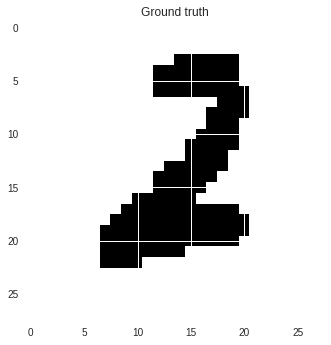

In [272]:
left10 = np.zeros((1,290)) 
left1 = np.zeros((1,299))  
left28 = np.zeros((1,272))  

n = 42

#image1 = np.reshape(loss_ten_full[0][2][0][4][n],(28,28))

image2 = np.reshape(image_full[n],(28,28))
 
plt.title('Ground truth')
plt.imshow(image2)

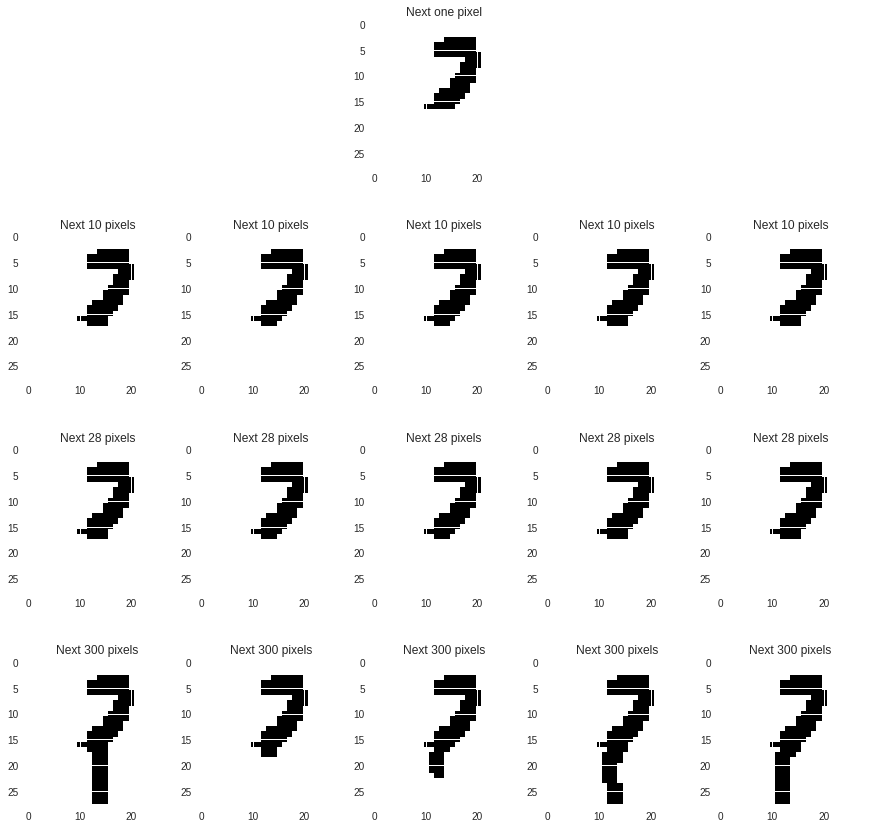

In [273]:

# random choose 5 sample
plt.figure(num='Comparison',figsize=(15,15))

choices = np.random.choice(range(9), 5,replace=False)
plt.subplot(4,5,3)
plt.title('Next one pixel')
pixels_1 = loss_full[choices[0]][0][2][0][4][n][0:-299]
plt.imshow(np.reshape(np.append(pixels_1, left1),(28,28)))

for i in range(3):
  for j in range(5):
    plt.subplot(4,5,i*5+j+6)
    if i == 0:
      plt.title('Next 10 pixels')    
      pixels_10 = loss_full[choices[j]][0][2][0][4][n][0:-290]
      plt.imshow(np.reshape(np.append(pixels_10, left10),(28,28)))
    if i == 1:
      plt.title('Next 28 pixels')
      pixels_28 = loss_full[choices[j]][0][2][0][4][n][0:-272]
      plt.imshow(np.reshape(np.append(pixels_28, left28),(28,28)))
 
    if i == 2:
      plt.title('Next 300 pixels')
      plt.imshow(np.reshape(loss_full[choices[j]][0][2][0][4][n],(28,28)))

# In-painting Task

### In-painting data 

We provide two datasets (one corresponing to the one-pixel in-painting tasks and the other one with a 2x2 patch missing). The datasets are available on [git](https://github.com/dianaborsa/compgi22_dl_cw4/blob/master/). Links are available in the description and code is provide below to load the dataset and visualize. Both datasets have 1000 sampled images from MNIST(test). Both dataset sets have the same simple structure: cropped images and their ground truth (GT). in this second task, you will consider the copped images and use your pixel-to-pixel model, try to predict the missing pixel/patches.


In [2]:
# Downloading the inpainting datasets
!git clone https://github.com/dianaborsa/compgi22_dl_cw4.git
!git clone https://github.com/dianaborsa/compgi22_dl_cw4/blob/master/one_pixel_inpainting.npy

Cloning into 'compgi22_dl_cw4'...
remote: Counting objects: 16, done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16 (delta 6), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.
Cloning into 'one_pixel_inpainting.npy'...
remote: Not Found
fatal: repository 'https://github.com/dianaborsa/compgi22_dl_cw4/blob/master/one_pixel_inpainting.npy/' not found


In [3]:
!ls

compgi22_dl_cw4  datalab


In [0]:
# Load the dataset (2X2)
dataset = np.load('compgi22_dl_cw4/2X2_pixels_inpainting.npy')
dataset_1 = np.load('compgi22_dl_cw4/one_pixel_inpainting.npy')

Loaded dataset has 1000 samples: cropped + GT


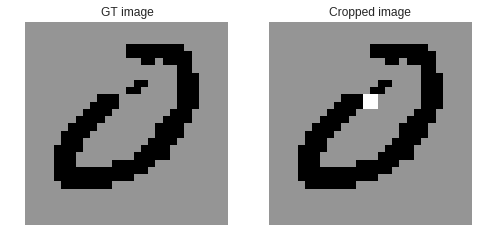

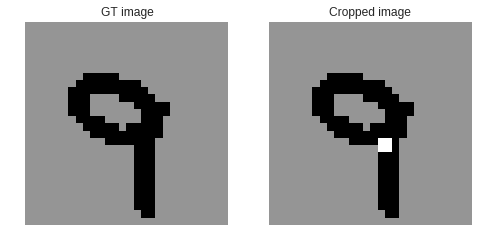

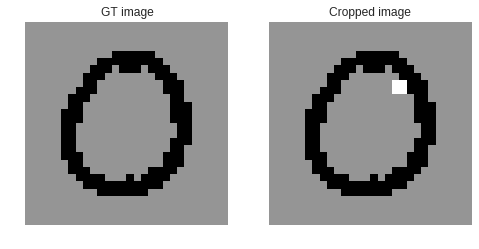

In [8]:
# checking loading
images    = dataset[0]
gt_images = dataset[1] 

nSamples, ndim = gt_images.shape
print('Loaded dataset has {} samples: cropped + GT'.format(nSamples))

# randomly visualize a few samples
for SampleID in np.random.randint(nSamples,size=3):
  plt.figure()
  plt.subplot(1,2,1)
  plt.imshow(np.reshape(gt_images[SampleID],(28,28)), interpolation='None',vmin=-1, vmax=1)
  plt.title("GT image")
  plt.grid(False)
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(np.reshape(images[SampleID],(28,28)), interpolation='None',vmin=-1, vmax=1)
  plt.title("Cropped image")
  plt.grid(False)
  plt.axis('off')

### One-pixel prediction 

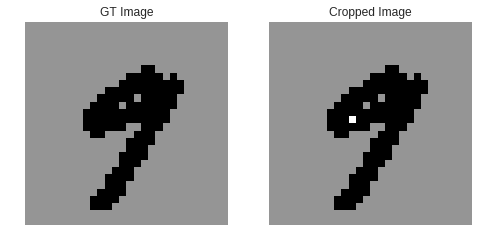

In [139]:
im = dataset_1[:,66,:]   #11

original_im = im[1,:]
missing_im = im[0,:]

plt.subplot(1,2,1)
plt.title('GT Image')
plt.imshow(np.reshape(original_im,(28,28)),interpolation='None',vmin=-1, vmax=1)
plt.grid(False)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Cropped Image')
plt.imshow(np.reshape(missing_im ,(28,28)),interpolation='None',vmin=-1, vmax=1)
plt.grid(False)
plt.axis('off')

ind = list(missing_im).index(-1) # missing number
ind1 = ind
ind2 = 783 - ind

def get_placeholders3(ind1, ind2):
  x = tf.placeholder(tf.float32, [None, ind1])
  y = tf.placeholder(tf.float32, [None, ind2])
  return x, y, 784 - ind

missing_im = np.reshape(missing_im, (1,784))

In [140]:
# Predicting the missing pixel
with tf.device('/device:GPU:*'):

  tf.reset_default_graph()
  num_epochs = 2
  learning_rate = 0.001
  batch_size = 256 
  num_hidden_unit = 32
  num_classes = 1
  fully_connected_hidden_units = 64
  initializer = tf.contrib.layers.xavier_initializer()

  time_steps = 28*28-1
  num_units = 1

  # LSTM
  RNN_layers = [tf.nn.rnn_cell.LSTMCell(size) for size in [num_hidden_unit]]

  multi_rnn_cell = tf.nn.rnn_cell.MultiRNNCell(RNN_layers)


  W_1 = tf.Variable(initializer([num_hidden_unit, fully_connected_hidden_units]))
  b_1 = tf.Variable(initializer([fully_connected_hidden_units]))

  W_2 = tf.Variable(initializer([fully_connected_hidden_units, num_classes]))
  b_2 = tf.Variable(initializer([num_classes]))

  x_test, y_test, n_p  = get_placeholders3(ind1, ind2)
  current = x_test
  y_test = tf.reshape(y_test, [1, -1])
  
  current = tf.reshape(current, [1, -1, 1])

  # Calculate the piror
  outputs_t, _ = tf.nn.dynamic_rnn(multi_rnn_cell, current, dtype=tf.float32)
  rnn_outputs_t = outputs_t[:, -1, :]   #batch_size * 1 * num_hidden
  rnn_outputs_t = tf.reshape(rnn_outputs_t, [-1, num_hidden_unit])
  A0_t = tf.nn.relu(rnn_outputs_t)
  A1_t = tf.nn.relu(tf.matmul(A0_t, W_1) + b_1)
  A2_t = tf.sigmoid(tf.matmul(A1_t, W_2) + b_2)
  current = tf.reshape(current, [1, -1])
  prob = A2_t[0][0] # piror
  current = tf.reshape(current, [-1, 784 - n_p])
    
  # Calculate the piror x_m =1 and x_m = 0
  prior = [1-prob, prob]
  results = []
  for i in range(2):
    if i==0:
      pix = tf.zeros([1,1], tf.float32)
      current_n = tf.concat([current, pix],1)
      
    if i==1:
      pix = tf.ones([1,1], tf.float32)
      current_n = tf.concat([current, pix],1)
    bayes = tf.log(prior[i])
    
    for j in range(n_p):
      current_n = tf.reshape(current_n, [-1, 785 - n_p + j, 1])

      outputs_t, _ = tf.nn.dynamic_rnn(multi_rnn_cell, current_n, dtype=tf.float32)
      rnn_outputs_t = outputs_t[:, -1, :]   #batch_size * 1 * num_hidden
      rnn_outputs_t = tf.reshape(rnn_outputs_t, [-1, num_hidden_unit])
      A0_t = tf.nn.relu(rnn_outputs_t)
      A1_t = tf.nn.relu(tf.matmul(A0_t, W_1) + b_1)
      A2_t = tf.sigmoid(tf.matmul(A1_t, W_2) + b_2)
      current_n = tf.reshape(current_n, [-1, 785 - n_p + j])
      if y_test[:,j] == 1:
        bayes = bayes + tf.log(A2_t)
      else:
        bayes = bayes + tf.log(1 - A2_t)

      # uniform rand 
      random_ = tf.reshape(tf.random_uniform((1, 1), minval=0, maxval=1,dtype=tf.float32), [1, 1])
      result = A2_t - random_

      result = tf.cast(result>0, result.dtype)
      current_n = tf.concat([current_n, result],1)
      
    results.append(bayes) 
    
  posterior = results  
  
  init = tf.global_variables_initializer()
  with tf.Session() as sess:
    sess.run(init)
    saver = tf.train.Saver()
    saver.restore(sess, "model3.ckpt")
    
    predict = sess.run(posterior, feed_dict={x_test: missing_im[:,0:ind], y_test: missing_im[:,ind+1:] })   
    print(predict)

INFO:tensorflow:Restoring parameters from model3.ckpt
[array([[-219.26108]], dtype=float32), array([[-146.11522]], dtype=float32)]


(-0.5, 27.5, 27.5, -0.5)

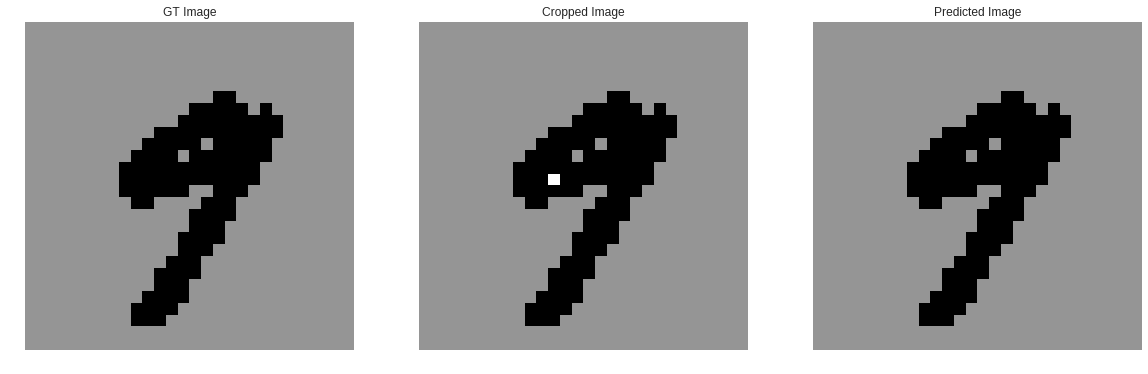

In [141]:
# Visualize samples
missing_im = np.reshape(missing_im,(784))

if np.argmax(predict) == 0:
  pred = 0
else:
  pred = 1

predicted_im = missing_im.copy()
predicted_im[list(missing_im).index(-1)] = pred
plt.figure(num='Comparison',figsize=(20,20))

plt.subplot(1,3,1)
plt.title('GT Image')
plt.imshow(np.reshape(original_im,(28,28)),interpolation='None',vmin=-1, vmax=1)
plt.grid(False)
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Cropped Image')
plt.imshow(np.reshape(missing_im ,(28,28)),interpolation='None',vmin=-1, vmax=1)
plt.grid(False)
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Predicted Image')
plt.imshow(np.reshape(predicted_im ,(28,28)),interpolation='None',vmin=-1, vmax=1)
plt.grid(False)
plt.axis('off')

### Two-by-two patch prediction 

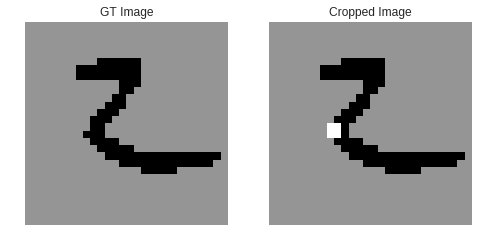

In [157]:
im = dataset[:,143,:]   #11

original_im = im[1,:]
missing_im = im[0,:]

plt.subplot(1,2,1)
plt.title('GT Image')
plt.imshow(np.reshape(original_im,(28,28)),interpolation='None',vmin=-1, vmax=1)
plt.grid(False)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Cropped Image')
plt.imshow(np.reshape(missing_im ,(28,28)),interpolation='None',vmin=-1, vmax=1)
plt.grid(False)
plt.axis('off')

ind = list(missing_im).index(-1) # missing number
ind_list = [ind, ind + 1, ind + 28, ind + 29]
ind1 = ind
ind2 = 783 - ind

def get_placeholders3(ind1, ind2):
  x = tf.placeholder(tf.float32, [None, ind1])
  y = tf.placeholder(tf.float32, [None, ind2])
  return x, y, 784 - ind

missing_im = np.reshape(missing_im, (1,784))

In [159]:
# Predicting the missing patch
result_patch = []
for k in ind_list:
  ind = k
  ind1 = ind
  ind2 = 783 - ind

  with tf.device('/device:GPU:*'):

    tf.reset_default_graph()
    num_epochs = 2
    learning_rate = 0.001
    batch_size = 256 
    num_hidden_unit = 32
    num_classes = 1
    fully_connected_hidden_units = 64
    initializer = tf.contrib.layers.xavier_initializer()

    time_steps = 28*28-1
    num_units = 1

    # LSTM
    RNN_layers = [tf.nn.rnn_cell.LSTMCell(size) for size in [num_hidden_unit]]

    multi_rnn_cell = tf.nn.rnn_cell.MultiRNNCell(RNN_layers)


    W_1 = tf.Variable(initializer([num_hidden_unit, fully_connected_hidden_units]))
    b_1 = tf.Variable(initializer([fully_connected_hidden_units]))

    W_2 = tf.Variable(initializer([fully_connected_hidden_units, num_classes]))
    b_2 = tf.Variable(initializer([num_classes]))

    x_test, y_test, n_p  = get_placeholders3(ind1, ind2)
    current = x_test
    y_test = tf.reshape(y_test, [1, -1])

    current = tf.reshape(current, [1, -1, 1])

    # Calculate the piror
    outputs_t, _ = tf.nn.dynamic_rnn(multi_rnn_cell, current, dtype=tf.float32)
    rnn_outputs_t = outputs_t[:, -1, :]   #batch_size * 1 * num_hidden
    rnn_outputs_t = tf.reshape(rnn_outputs_t, [-1, num_hidden_unit])
    A0_t = tf.nn.relu(rnn_outputs_t)
    A1_t = tf.nn.relu(tf.matmul(A0_t, W_1) + b_1)
    A2_t = tf.sigmoid(tf.matmul(A1_t, W_2) + b_2)
    current = tf.reshape(current, [1, -1])
    prob = A2_t[0][0] # piror
    current = tf.reshape(current, [-1, 784 - n_p])

    # Calculate the piror x_m =1 and x_m = 0
    prior = [1-prob, prob]
    results = []
    for i in range(2):
      if i==0:
        pix = tf.zeros([1,1], tf.float32)
        current_n = tf.concat([current, pix],1)

      if i==1:
        pix = tf.ones([1,1], tf.float32)
        current_n = tf.concat([current, pix],1)
      bayes = tf.log(prior[i])

      for j in range(n_p):
        current_n = tf.reshape(current_n, [-1, 785 - n_p + j, 1])

        outputs_t, _ = tf.nn.dynamic_rnn(multi_rnn_cell, current_n, dtype=tf.float32)
        rnn_outputs_t = outputs_t[:, -1, :]   #batch_size * 1 * num_hidden
        rnn_outputs_t = tf.reshape(rnn_outputs_t, [-1, num_hidden_unit])
        A0_t = tf.nn.relu(rnn_outputs_t)
        A1_t = tf.nn.relu(tf.matmul(A0_t, W_1) + b_1)
        A2_t = tf.sigmoid(tf.matmul(A1_t, W_2) + b_2)
        current_n = tf.reshape(current_n, [-1, 785 - n_p + j])
        if y_test[:,j] == 1:
          bayes = bayes + tf.log(A2_t)
        else:
          bayes = bayes + tf.log(1 - A2_t)

        # uniform rand 
        random_ = tf.reshape(tf.random_uniform((1, 1), minval=0, maxval=1,dtype=tf.float32), [1, 1])
        result = A2_t - random_

        result = tf.cast(result>0, result.dtype)
        current_n = tf.concat([current_n, result],1)

      results.append(bayes) 

    posterior = results  

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
      sess.run(init)
      saver = tf.train.Saver()
      saver.restore(sess, "model3.ckpt")

      predict1 = sess.run(posterior, feed_dict={x_test: missing_im[:,0:ind], y_test: missing_im[:,ind+1:] })   
      print(predict1, 'prior:',prob)
      result_patch.append(predict1)



INFO:tensorflow:Restoring parameters from model3.ckpt
1 [array([[-10.179286]], dtype=float32), array([[-75.527565]], dtype=float32)]
INFO:tensorflow:Restoring parameters from model3.ckpt
1 [array([[-142.04602]], dtype=float32), array([[-187.46219]], dtype=float32)]
INFO:tensorflow:Restoring parameters from model3.ckpt
1 [array([[-160.34012]], dtype=float32), array([[-542.80023]], dtype=float32)]
INFO:tensorflow:Restoring parameters from model3.ckpt
1 [array([[-2.700427]], dtype=float32), array([[-355.3424]], dtype=float32)]


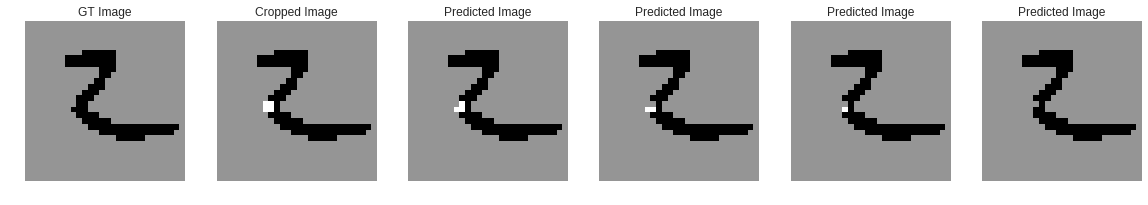

In [183]:
# Visualize samples
missing_im = np.reshape(missing_im,(784))

plt.figure(num='Comparison',figsize=(20,20))
plt.subplot(1,6,1)
plt.title('GT Image')
plt.imshow(np.reshape(original_im,(28,28)),interpolation='None',vmin=-1, vmax=1)
plt.grid(False)
plt.axis('off')

plt.subplot(1,6,2)
plt.title('Cropped Image')
plt.imshow(np.reshape(missing_im ,(28,28)),interpolation='None',vmin=-1, vmax=1)
plt.grid(False)
plt.axis('off')

predicted_im = missing_im.copy()
for i in range(4):

  predicted_im[ind_list[i]] = np.argmax(result_patch[i])
  plt.subplot(1,6,3+i)
  plt.title('Predicted Image')
  plt.imshow(np.reshape(predicted_im ,(28,28)),interpolation='None',vmin=-1, vmax=1)
  plt.grid(False)
  plt.axis('off')

----------------------------------------------------------------------

## PART 2: Learning multiple tasks with LSTM-s (40 pts)
(Credits to Pedro Ortega for insipring the task and insights behind it)

### Task Description

Consider the following generative model: 
* We have $3$ symbols that will be generates from a multinomial/categorical distribution, with parameters $\textbf{p}=(p_1, p_2, p_3)$: symbol 1 is generated with probability $p_1$, symbol 2 is generated with probability $p_2$, symbol 3 with probability $p_3$. 
$$X \sim Categorical(3, \textbf{p})$$

* The parameter vector $\textbf{p}$ is drawn from a Dirichlet prior: $$\textbf{p} \sim Dirichlet(\alpha)$$

We are going to use the above to generate sequences (a continuous stream of data/observations), in the following way:
* Step 1: We sample $\textbf{p}$ from the prior
* Step 2: Given this $\textbf{p}$, for $T-1$ time-steps we will generate i.i.d observations by sampling one of the $3$ symbols from the categorical distribution induced by $\textbf{p}$
$$ (X_1, X_2, \cdots X_{T-1}) , s.t. X_i \sim Categorical(3, \textbf{p})$$
* Step 3: At the end of the sequence we append a fourth symbol (RESET): $(X_1, X_2, \cdots X_T, RESET)$
* Step 4: Return to Step 1 and resample $\textbf{p}$. 
* Repeat this 'forever'.

This will give rise to a continuous stream of data, of the form: $ x_1, x_2, \cdots x_{T-1}, RESET, x_{T+1}, x_{T+2}, \cdots x_{2T}, RESET, \cdots, x_{kT+1}, x_{kT+2}, \cdots x_{(k+1)T}, RESET, \cdots$.

Note: Data generation is provided for you in the cell below. (You just need to call the minibatch function to get a sequence of this form).

### Model

We are going to consider an simple LSTM (32 units hidden state) and present this (generated) sequence of data as an input. Similar to the pixel-to-pixel model, at each time step the LSTM will receive one bit of information (gets to observe the symbol recorded at this time step) and need to output the probability distribution for the next symbol. Thus, at time $t$ the LSTM get as input the symbol $x_t$ and will return a probability over the next state $P(x_{t+1}| x_{t}, LSTM_{t-1})$.

### Questions

1) **Without running any experiments (5 pts)**, try to think about the following scenarios and answer these questions: 
* Consider we generate the data with $Dirichlet(\alpha)$, where $\alpha = (10.,1.,1.)$. What do you think the LSTM model will learn, if anything? Remember we are effectively changing the prediction task, every time we are resampling the probability vector $\textbf{p}$. * Hint: Think about the distribution over $\textbf{p}$ that this prior induces. *

The prior distribution of $\mathbf{p}$ is $p(\mathbf{p})=\frac{1}{B(\mathbf{\alpha})}\prod_{i=1}^{3}p_i^{\alpha_i - 1}$, and function $B$ is the Beta function (multivariate). $\alpha = (10,1,1)$ will result in $p_1$ having the majority of the weight subject to $p_1+p_2+p_3=1$, so $p_1$ is very likely to take a value close to one, which means symbol one will be sampled for most of the time. LSTM will perform better on such stable patterns, all it has left to learn is the when to reset. 

* What if we consider a more uniformative prior, like $\alpha=(1.1, 1.1, 1.1)$? 

If $\alpha = (1.1,1.1,1.1)$, this prior will result in $p_1$, $p_2$ and $p_3$ being uniformly distributed. Thus the sequence they generated are more fulctuate and harder for LSTM to predict. Maybe in this case LSTM cannot interpret the hidden structure well, given that the probabilities been reset regularly, since it has equal likely chances of seeing extreme values (like $(1,0,0)$) and more averaged values (like $(\frac{1}{3},\frac{1}{3},\frac{1}{3})$) of $p$'s.

* How does this (learning ability and generalization) depend on the lenght of the tasks $T$ and the unrolling length on the LSTM? It might be helpful to consider the two extremes: 
i) $T=1$ (we reset the task at every time step). What should the model learn in this case?, ii) $T=\infty$ (we sample the task once and keep it forever). What should the model learn in this case? (Answer this for both previous priors)

For T =1,the it is very hard for extreme prior to makes any difference to the leaning and generalization ability, because the resampled p is very close to (1,0,0) in each step. When T = ∞, it does not need to learn the time of reset and just predict next symbol, so the leaning and generalization ability is not so important. 
If the prior is in uniform distribution, for T = 1, the LSTM will perform very badly in prediction because it cannot learn the potential structure well. Although it can study the precise potential distribution, the randomness in the uniform prior is very high and it cannot learn a high accuracy. If T = ∞, LSTM can learn well in terms of the enough unrolling length because the probabilities are constant. However, the generalization could be not good.

* Does this increase or descrease the complexity of the prediction problem? What about the ability to generalize to unseen $\textbf{p}$?

The complexity can be considered as the difficulty of predicting sequence unseen in training. If the T is large, the complexity usually will increase, because the model is harder to learn the potential distributions. The model may just use a few combinations to learn the probabilities. However, the combinations used could be sampled from a large range. Thus, the accuracy of predicting on unseen p will decrease and the complexity will increase. 

2) **Time to check your intuitions (10 pts)** 

Implement a similar LSTM model as in PART 1. This will take as input a one-hot description of the obsevation ($[1,0,0,0]$ for symbol 1. $[0,1,0,0]$ for symbol 2, $[0,0,1,0]$ for symbol 3, $[0,0,0,1]$ for the RESET symbol). This input is fed into a 32-unit LSTM and LSTM output is processed as before: $\textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Output}$ . The model will be trained, as before, by cross-entropy on predicting the next symbol. You will notice that the setup is really similar to the previous tasks, so feel free to re-use whenever appropiate.

Train the following models:
* T = 5, and T=20 with the data generated from a Dirichlet with $\alpha = (10.,1.,1.)$. Unrolling length for the LSTM = 100. Minibatch size = 64. (M1, M2)
* T = 5, and T=20 with the data generated from a Dirichlet with$\alpha = (1.3, 1.3, 1.3)$ Unrolling length for the LSTM = 100. Minibatch size = 64. (M3, M4)

Train the models for $1000$ iterations ($1000$ minibatches). Record the training and testing preformance (every 10-20 iterations). Plot the curves over training time. What do you observe? (Is this curve smooth? Do any of them plateau?). **[2x5 pts]**


3) **Analysis results (10 pts)**

In this section, we will investigate what the models have actaully learnt. For this we will generate a few test sequences:
* *Test sequence 1*: generate a test sequence that changes tasks every T=5 steps from a a Dirichlet with $\alpha = (10.,1.,1.)$.
* *Test sequence 2*: generate a test sequence that changes tasks every T=5 steps from a a Dirichlet with $\alpha = (1.3,1.3,1.3)$.
* *Test sequence 3*: generate a test sequence that 'changes tasks' every T=5 steps, but keep sampling according to the same probability vector $\textbf{p}=(1,0,0)$ (You can use any of the extreme here).

i) Test the preformance of M1 and M3 and these test sequences. In addition plot the actual prediction the models do (probability of symbols over time). This should give you more insight in what the model does. Does this correspond or contradict your previous intuitions? **[5 pts]**

ii) Repeat the same procedure for task length $T=20$ and models M2 and M4. What do you observe? How do M2 and M4 compare to each other and how to their compare to M1 and M3 (the models trained on the shorter task length). **[5 pts]**

4) **Comparison to the Bayesian update (15 pts)**

Going back to the generative process in the task description. For a given prior, for each the mini-tasks (selecting/sampling a $\textbf{p}$), one could compute the Bayesian posterior at each time step.  We start with a prior and every time we observe a symbol with update our posterior over the parameters
 $\textbf{p}$ given the data. We do this every time step, till we reach the RESET symbol which marks the end of the task. Then we start again, from the prior.

i) Derive the posterior update for each time step. (Hint: since the two distribution are conjugates or each other, the posterior has a closed form). **[3 pts]**

ANS：

The prior is alos Dirichlet distribution because the prior and likelihood are conjugate. 

The prior is: 

$$
p_1, p_2, p_3 \sim \frac{\Gamma (\sum_{i=1}^{3}\alpha_i)}{\sum_{i=1}^{3}\Gamma (\alpha_i )} \prod\limits_{i=1}^{3} p_i^{\alpha_i  - 1}
$$

The likelihood is:

$$
x_1, x_2, x_3 \sim \frac{\Gamma (n+1)}{\sum_{i=1}^{3}p_i^{x_i}} \prod\limits_{i=1}^{3} p_i^{x_i}
$$

Thus, for one observation $X_1 = (x_1^{(1)},x_1^{(2)},x_1^{(3)})$, the posterior is:

$$
P(p_1, p_2, p_3|X_1) \propto  \prod\limits_{i=1}^{3} p_i^{\alpha_i  - 1} \prod\limits_{i=1}^{3} p_i^{x_i} \propto \prod\limits_{i=1}^{3} p_i^{\alpha_i  - 1 + x_1^{(i)}}
$$

Then we can see:

$$
p_1, p_2, p_3|X_1 \sim Dirichlet(\alpha_1 - 1 + x_1^{(1)}, \alpha_2 - 1 + x_1^{(2)}, \alpha_3 - 1 + x_1^{(3)}) 
$$

Thus, for T observations $X_1, X_2, X_3, ... X_T$, the posterior is:

$$
P(p_1, p_2, p_3|X_1, X_2, X_3, ... X_T) \propto  \prod\limits_{i=1}^{3} p_i^{\alpha_i  - 1 + \sum_{j=1}^{T}   x_j^{(i)}}
$$

Then we can see:

$$
p_1, p_2, p_3|X_1, X_2, X_3, ... X_T \sim Dirichlet(\alpha_1 - 1 + \sum_{i=1}^{T}x_i^{(1)}, \alpha_2 - 1 + \sum_{i=1}^{T}x_i^{(2)}, \alpha_3 - 1 + \sum_{i=1}^{T}x_i^{(3)}) 
$$




ii) Implement this posterior update and use it to infer the probabilities over the next symbol, for the previously generated test sequences. This will tell you, what the inferred probabilities would be, if we knew the structure of the model, the prior and that the reset symbol means the tasks has finished and we should reset our estimate to the prior. (For test sequence 1 and 2, use the prior that generated them, for test sequence 3 compute the updates starting from both priors) **[5 pts]**

ANS:

The probabilities can be writen as:


$$
\begin{align}
P(x_{T+1} = i| X_1, X_2, X_3, ... X_T, \alpha_1, \alpha_2, \alpha_3 ) &= \int_pP(x_{T+1}|p)P(p|X_1, X_2, X_3, ... X_T, \alpha_1, \alpha_2, \alpha_3)dp\\ 
&= \frac{\sum_{i=1}^{3}\sum_{j=1}^{T}x_j^{(i)} + \alpha_i}{L + \sum_{m=1}^{3}\alpha_m}
\end{align}
$$

Where $L = \sum_{i=1}^{3}\sum_{j=1}^{T}x_j^{(i)}$

iii) Compare this to what the LSTM predictions are. What do you observe? What are the failure cases -- can you explain why this might happen? (For test sequence 1 and 2, use the prior that generated them, for test sequence 3 compute the updates starting from both priors). **[7 pts]**
 
For this analysis, only consider $T=20$ and respectively models M2 and M4.

5) **Play (not for credit, just for fun)**

Visualize the hidden state of the LSTM. Look at the eigenvalues: How many of these are actual revelant? What do they correspond to?




In [0]:
#@title Generate data function

n_symbols = 3
def get_data_per_task(number_samples_per_task=10, p=None, alpha=None):
  if p == None:
    # sample task
    if alpha == None:
      p = np.random.dirichlet((1.3, 1.3, 1.3), 1)[0]
    else:
      p = np.random.dirichlet(alpha, 1)[0]
    
  p = np.append(p, [0])
  sample = np.random.multinomial(1, p, size = number_samples_per_task)
  
  sample = np.append(sample,[[0,0,0,1]], axis=0)
  return sample
  

def get_data(ntasks, nsamples_per_task, p=None, alpha=None):
  sample = []
  for task_id in range(ntasks):
    sample.append(get_data_per_task(number_samples_per_task = nsamples_per_task, p=p, alpha=alpha))
  return np.concatenate(sample)


def get_minibatch(batch_size, ntasks, nsamples_per_task, p=None, alpha=None):
  sample = get_data(batch_size*ntasks, nsamples_per_task, p=p, alpha=alpha)
  return np.reshape(sample, [batch_size, ntasks*(nsamples_per_task+1), n_symbols+1])
  

### Training your recurrent model

In [70]:
#@title Your models
# Advisable to you GPU for this part
alpha_list = [[10., 1., 1.],[1.3, 1.3, 1.3]]
T_list = [5, 20]
result = []
model_number = 0
for alpha in alpha_list:
  for T in T_list:
    model_number += 1
    print("This is model %d" %(model_number))
    with tf.device('/device:GPU:*'):

      tf.reset_default_graph()

      # your model here.... 
      x = tf.placeholder(tf.float32,[None, None, 4])
      y = tf.placeholder(tf.float32,[None, None, 4])  

      rnn_cell = tf.nn.rnn_cell.LSTMCell(32)
      initializer = tf.contrib.layers.xavier_initializer()

      # RNN
      outputs, states = tf.nn.dynamic_rnn(cell = rnn_cell,
                                          inputs = x,
                                          dtype = tf.float32)

      relu_outputs = tf.nn.relu(outputs)

      # Fully connected 
      hidden_1 = tf.contrib.layers.fully_connected(inputs = relu_outputs,
                                                  num_outputs = 64,
                                                  activation_fn = tf.nn.relu,
                                                  weights_initializer = initializer,
                                                  biases_initializer = initializer)

      logits = tf.contrib.layers.fully_connected(inputs = hidden_1,
                                                 num_outputs = 4,
                                                 activation_fn = None,
                                                 weights_initializer = initializer,
                                                 biases_initializer = initializer)

      loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = logits))
      train_op = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss_op)
      y_pred = tf.nn.softmax(logits)

      batch_size = 64
      unroll_len = 100
      loss_model = {'train':[], 'test':[]}

      init = tf.global_variables_initializer()
      raw_data = get_minibatch(batch_size, round(unroll_len/T), T-1, alpha=alpha)

      test_xs = raw_data[:,:-1,:]
      test_ys = raw_data[:,1:,:]  

      with tf.Session() as sess:
        sess.run(init)
        i = 0
        while i < 1000:
          raw_data = get_minibatch(batch_size, round(unroll_len/T), T-1, alpha=alpha)
          batch_xs = raw_data[:,:-1,:]
          batch_ys = raw_data[:,1:,:]  
          sess.run(train_op, feed_dict = {x:batch_xs, y: batch_ys})
          i += 1
          if i % 20 == 0:
            loss_train = sess.run(loss_op, feed_dict = {x:batch_xs, y: batch_ys})
            loss_model['train'].append(loss_train)

            loss_test = sess.run(loss_op, feed_dict = {x:test_xs, y: test_ys})
            loss_model['test'].append(loss_test)

            
        print(loss_model)           
        result.append(loss_model)
            
        saver = tf.train.Saver()
        

        if model_number == 1:
          save_path = saver.save(sess, "./model_DL4/M1.ckpt")
          print("Model 1 saved in path: %s" % save_path)  

        if model_number == 2:
          save_path = saver.save(sess, "./model_DL4/M2.ckpt")
          print("Model 2 saved in path: %s" % save_path)

        if model_number == 3:
          save_path = saver.save(sess, "./model_DL4/M3.ckpt")
          print("Model 3 saved in path: %s" % save_path)

        if model_number == 4:
          save_path = saver.save(sess, "./model_DL4/M4.ckpt")
          print("Model 4 saved in path: %s" % save_path)


This is model 1
{'train': [0.98201966, 0.93800956, 0.9455904, 0.91232955, 0.9012866, 0.7893965, 0.67393225, 0.55815434, 0.5017037, 0.48953816, 0.47264123, 0.47435966, 0.46508458, 0.47093868, 0.45730937, 0.46216047, 0.43871337, 0.46064565, 0.4531716, 0.45498982, 0.44920832, 0.45471203, 0.45706293, 0.41503385, 0.46712765, 0.45952398, 0.46050826, 0.45416692, 0.4367432, 0.4660838, 0.44195974, 0.437009, 0.44413364, 0.45804206, 0.4415437, 0.43196413, 0.4527813, 0.4562294, 0.43796554, 0.45892, 0.43172854, 0.45628577, 0.4334722, 0.45243335, 0.44366884, 0.46381032, 0.45114908, 0.46730927, 0.44708374, 0.439003], 'test': [0.9676885, 0.94710284, 0.93869406, 0.92012715, 0.8746737, 0.78399545, 0.66337436, 0.55545413, 0.49340513, 0.47182664, 0.46388182, 0.4596298, 0.45678025, 0.45422572, 0.45224047, 0.4502357, 0.4486045, 0.44706216, 0.4460894, 0.44463533, 0.44368044, 0.44278693, 0.4424064, 0.44166538, 0.4413374, 0.4410804, 0.44080463, 0.44044003, 0.44021606, 0.44019094, 0.4402879, 0.44000614, 0.44014

In [0]:
from google.colab import files
files.download( "M4.ckpt.meta" ) 

In [12]:
!ls

checkpoint		     M3.ckpt.index
M1.ckpt.data-00000-of-00001  M3.ckpt.meta
M1.ckpt.index		     M4.ckpt.data-00000-of-00001
M1.ckpt.meta		     M4.ckpt.index
M2.ckpt.data-00000-of-00001  M4.ckpt.meta
M2.ckpt.index		     MNIST_data
M2.ckpt.meta		     model_DL4
M3.ckpt.data-00000-of-00001


In [11]:
cd model_DL4

/content/model_DL4/model_DL4/model_DL4


In [100]:
pwd

'/content/model_DL4/model_DL4/model_DL4'

In [0]:
!rm -f M*

### Analysing your recurrent model

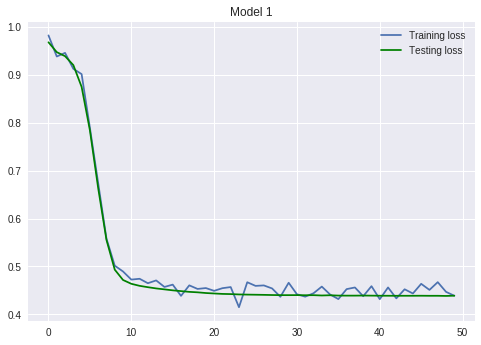

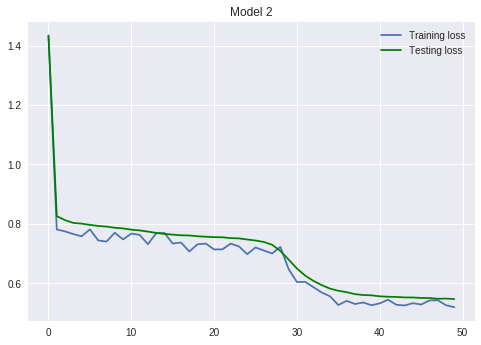

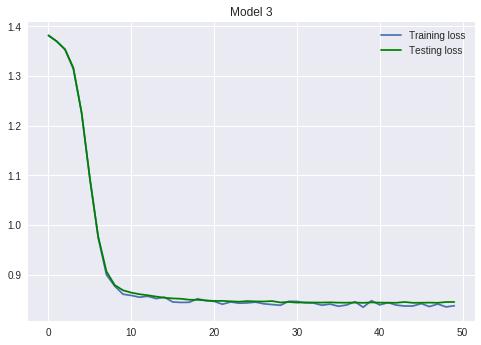

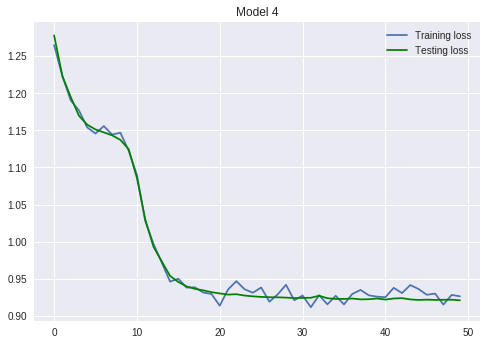

In [95]:
# Plot learning curves 

for i in range(4):
    plt.figure(num='Comparison',figsize=(20,20))
    plot_learning_curves( result[i]['train'],  result[i]['test'])
    plt.title('Model %d' %(i+1))

In [67]:
#@title Your models
# Advisable to you GPU for this part
alpha_list = [[10., 1., 1.],[1.3, 1.3, 1.3]]
T_list = [5, 20]
model_number = 0
batch_size = 1
unroll_len = 100
result = []
gt = {}

with tf.device('/device:GPU:*'):

  tf.reset_default_graph()

  # your model here.... 
  x = tf.placeholder(tf.float32,[None, None, 4])
  y = tf.placeholder(tf.float32,[None, None, 4])  

  rnn_cell = tf.nn.rnn_cell.LSTMCell(32)
  initializer = tf.contrib.layers.xavier_initializer()

  # RNN
  outputs, states = tf.nn.dynamic_rnn(cell = rnn_cell,
                                      inputs = x,
                                      dtype = tf.float32)

  relu_outputs = tf.nn.relu(outputs)

  # Fully connected 
  hidden_1 = tf.contrib.layers.fully_connected(inputs = relu_outputs,
                                              num_outputs = 64,
                                              activation_fn = tf.nn.relu,
                                              weights_initializer = initializer,
                                              biases_initializer = initializer)

  logits = tf.contrib.layers.fully_connected(inputs = hidden_1,
                                             num_outputs = 4,
                                             activation_fn = None,
                                             weights_initializer = initializer,
                                             biases_initializer = initializer)

  y_pred = tf.nn.softmax(logits)



  init = tf.global_variables_initializer()

  with tf.Session() as sess:
    sess.run(init)
    
    saver = tf.train.Saver()

    
    # Sequence 1
    
    T = 5
    alpha = alpha_list[0]
    raw_data = get_minibatch(batch_size, round(unroll_len/T), T-1, alpha=alpha)
    batch_xs = raw_data[:,:-1,:]
    batch_ys = raw_data[:,1:,:] 
    gt['Sequence 1'] = batch_ys

    # Model 1
    saver.restore(sess, "M1.ckpt")
    result.append(sess.run(y_pred, feed_dict = {x:batch_xs, y: batch_ys}))
    
    # Model 3
    
    saver.restore(sess, "M3.ckpt")
    result.append(sess.run(y_pred, feed_dict = {x:batch_xs, y: batch_ys}))
     
    # Sequence 2
    
    alpha = alpha_list[1]
    raw_data = get_minibatch(batch_size, round(unroll_len/T), T-1, alpha=alpha)
    batch_xs = raw_data[:,:-1,:]
    batch_ys = raw_data[:,1:,:] 
    gt['Sequence 2'] = batch_ys

    # Model 1
    saver.restore(sess, "M1.ckpt")
    result.append(sess.run(y_pred, feed_dict = {x:batch_xs, y: batch_ys}))
    
    # Model 3
    
    saver.restore(sess, "M3.ckpt")
    result.append(sess.run(y_pred, feed_dict = {x:batch_xs, y: batch_ys}))

    # Sequence 3

    raw_data = get_minibatch(batch_size, round(unroll_len/T), T-1, p = (1, 0, 0))
    batch_xs = raw_data[:,:-1,:]
    batch_ys = raw_data[:,1:,:] 
    gt['Sequence 3'] = batch_ys

    # Model 1
    saver.restore(sess, "M1.ckpt")
    result.append(sess.run(y_pred, feed_dict = {x:batch_xs, y: batch_ys}))
    
    # Model 3
    
    saver.restore(sess, "M3.ckpt")
    result.append(sess.run(y_pred, feed_dict = {x:batch_xs, y: batch_ys}))    

################################################################################

    # Sequence 1
    
    T = 10
    alpha = alpha_list[0]
    raw_data = get_minibatch(batch_size, round(unroll_len/T), T-1, alpha=alpha)
    batch_xs = raw_data[:,:-1,:]
    batch_ys = raw_data[:,1:,:] 
    gt['Sequence 4'] = batch_ys

    # Model 1
    saver.restore(sess, "M2.ckpt")
    result.append(sess.run(y_pred, feed_dict = {x:batch_xs, y: batch_ys}))
    
    # Model 3
    
    saver.restore(sess, "M4.ckpt")
    result.append(sess.run(y_pred, feed_dict = {x:batch_xs, y: batch_ys}))
     
    # Sequence 2
    
    alpha = alpha_list[1]
    raw_data = get_minibatch(batch_size, round(unroll_len/T), T-1, alpha=alpha)
    batch_xs = raw_data[:,:-1,:]
    batch_ys = raw_data[:,1:,:] 
    gt['Sequence 5'] = batch_ys

    # Model 1
    saver.restore(sess, "M2.ckpt")
    result.append(sess.run(y_pred, feed_dict = {x:batch_xs, y: batch_ys}))
    
    # Model 3
    
    saver.restore(sess, "M4.ckpt")
    result.append(sess.run(y_pred, feed_dict = {x:batch_xs, y: batch_ys}))

    # Sequence 3

    raw_data = get_minibatch(batch_size, round(unroll_len/T), T-1, p = (1, 0, 0))
    batch_xs = raw_data[:,:-1,:]
    batch_ys = raw_data[:,1:,:] 
    gt['Sequence 6'] = batch_ys

    # Model 1
    saver.restore(sess, "M2.ckpt")
    result.append(sess.run(y_pred, feed_dict = {x:batch_xs, y: batch_ys}))
    
    # Model 3
    
    saver.restore(sess, "M4.ckpt")
    result.append(sess.run(y_pred, feed_dict = {x:batch_xs, y: batch_ys})) 



INFO:tensorflow:Restoring parameters from M1.ckpt
INFO:tensorflow:Restoring parameters from M3.ckpt
INFO:tensorflow:Restoring parameters from M1.ckpt
INFO:tensorflow:Restoring parameters from M3.ckpt
INFO:tensorflow:Restoring parameters from M1.ckpt
INFO:tensorflow:Restoring parameters from M3.ckpt
INFO:tensorflow:Restoring parameters from M2.ckpt
INFO:tensorflow:Restoring parameters from M4.ckpt
INFO:tensorflow:Restoring parameters from M2.ckpt
INFO:tensorflow:Restoring parameters from M4.ckpt
INFO:tensorflow:Restoring parameters from M2.ckpt
INFO:tensorflow:Restoring parameters from M4.ckpt


### Test M1 and M3

Text(0.5,1,'Sequence 3 Ground truth')

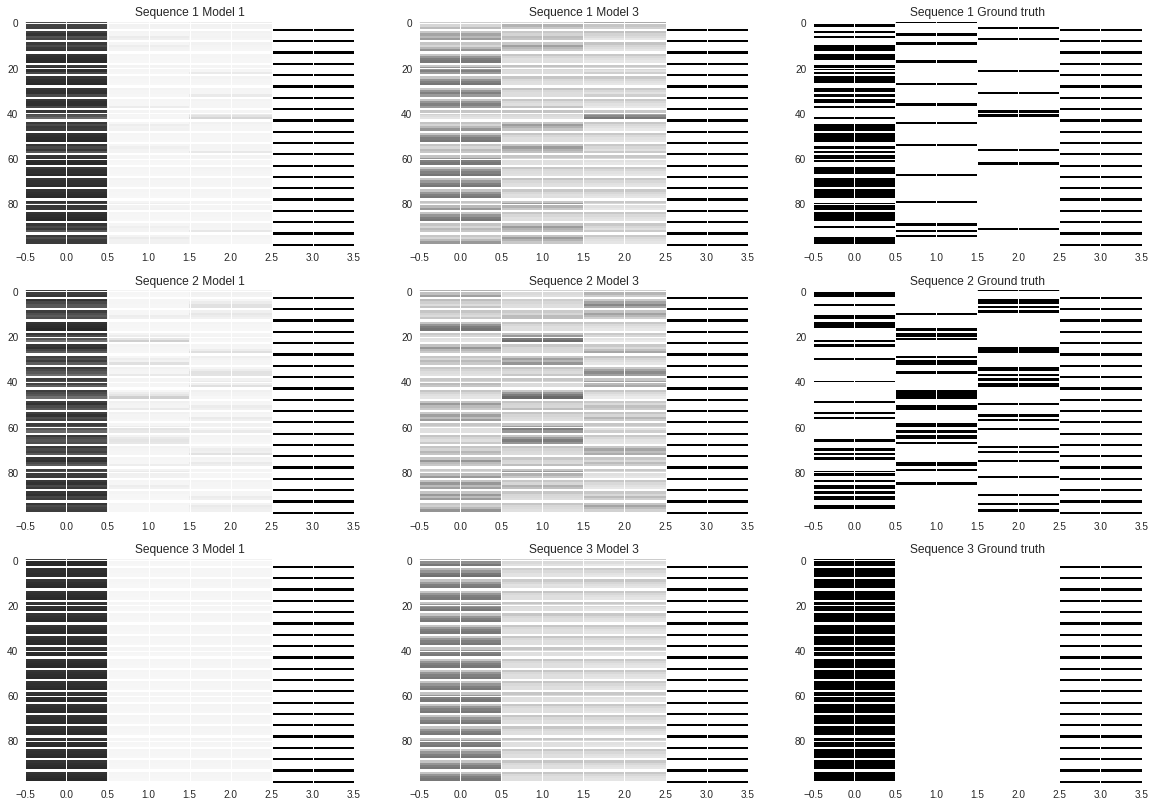

In [72]:
plt.figure(num='Comparison',figsize=(20,14))

# Sequence 1
plt.subplot(3,3,1)
dst = np.reshape(result[0], (-1, 4))
plt.imshow(dst, aspect = 'auto')
plt.title('Sequence 1 Model 1')

plt.subplot(3,3,2)
dst = np.reshape(result[1], (-1, 4))
plt.imshow(dst, aspect = 'auto')
plt.title('Sequence 1 Model 3')

plt.subplot(3,3,3)
dst = np.reshape(gt['Sequence 1'], (-1, 4))
plt.imshow(dst, aspect = 'auto')
plt.title('Sequence 1 Ground truth')

# Sequence 2
plt.subplot(3,3,4)
dst = np.reshape(result[2], (-1, 4))
plt.imshow(dst, aspect = 'auto')
plt.title('Sequence 2 Model 1')

plt.subplot(3,3,5)
dst = np.reshape(result[3], (-1, 4))
plt.imshow(dst, aspect = 'auto')
plt.title('Sequence 2 Model 3')

plt.subplot(3,3,6)
dst = np.reshape(gt['Sequence 2'], (-1, 4))
plt.imshow(dst, aspect = 'auto')
plt.title('Sequence 2 Ground truth')

# Sequence 3
plt.subplot(3,3,7)
dst = np.reshape(result[4], (-1, 4))
plt.imshow(dst, aspect = 'auto')
plt.title('Sequence 3 Model 1')

plt.subplot(3,3,8)
dst = np.reshape(result[5], (-1, 4))
plt.imshow(dst, aspect = 'auto')
plt.title('Sequence 3 Model 3')

plt.subplot(3,3,9)
dst = np.reshape(gt['Sequence 3'], (-1, 4))
plt.imshow(dst, aspect = 'auto')
plt.title('Sequence 3 Ground truth')


### Test M2 and M4 

Text(0.5,1,'Sequence 3 Ground truth')

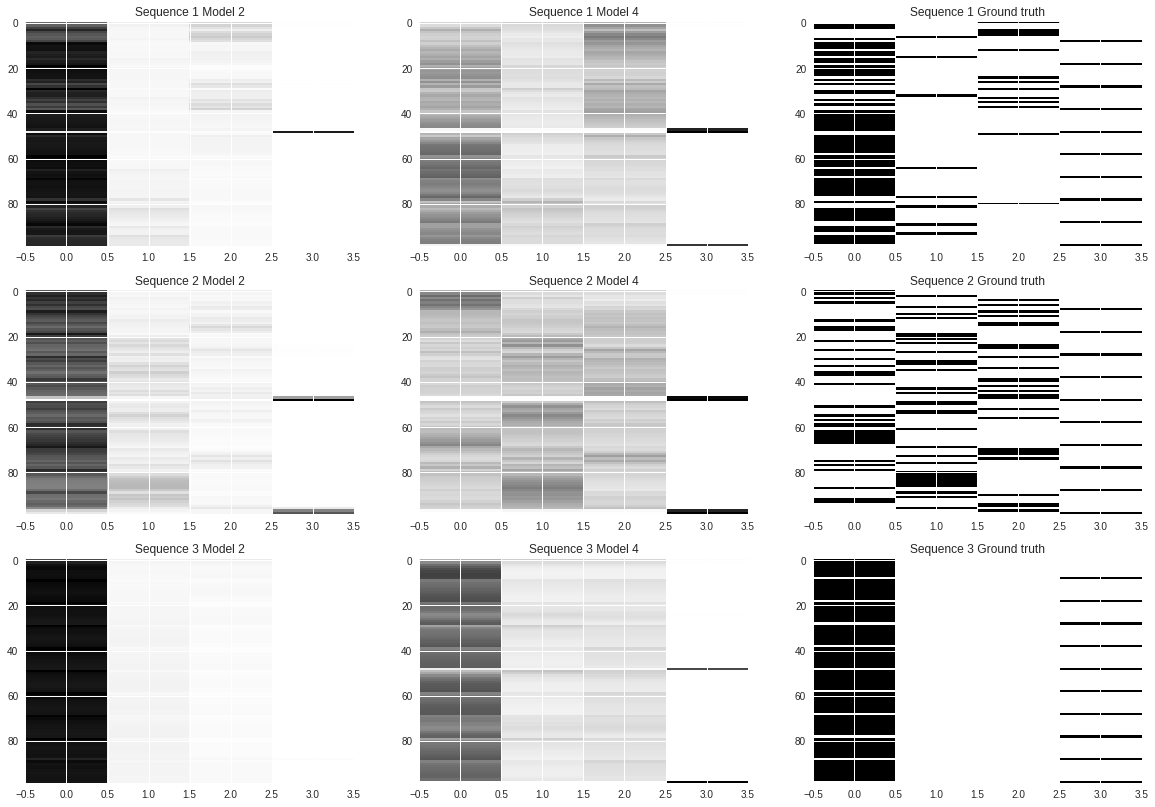

In [70]:
plt.figure(num='Comparison',figsize=(20,14))

# Sequence 1
plt.subplot(3,3,1)
dst = np.reshape(result[6], (-1, 4))
plt.imshow(dst, aspect = 'auto')
plt.title('Sequence 1 Model 2')

plt.subplot(3,3,2)
dst = np.reshape(result[7], (-1, 4))
plt.imshow(dst, aspect = 'auto')
plt.title('Sequence 1 Model 4')

plt.subplot(3,3,3)
dst = np.reshape(gt['Sequence 4'], (-1, 4))
plt.imshow(dst, aspect = 'auto')
plt.title('Sequence 1 Ground truth')

# Sequence 2
plt.subplot(3,3,4)
dst = np.reshape(result[8], (-1, 4))
plt.imshow(dst, aspect = 'auto')
plt.title('Sequence 2 Model 2')

plt.subplot(3,3,5)
dst = np.reshape(result[9], (-1, 4))
plt.imshow(dst, aspect = 'auto')
plt.title('Sequence 2 Model 4')

plt.subplot(3,3,6)
dst = np.reshape(gt['Sequence 5'], (-1, 4))
plt.imshow(dst, aspect = 'auto')
plt.title('Sequence 2 Ground truth')

# Sequence 3
plt.subplot(3,3,7)
dst = np.reshape(result[10], (-1, 4))
plt.imshow(dst, aspect = 'auto')
plt.title('Sequence 3 Model 2')

plt.subplot(3,3,8)
dst = np.reshape(result[11], (-1, 4))
plt.imshow(dst, aspect = 'auto')
plt.title('Sequence 3 Model 4')

plt.subplot(3,3,9)
dst = np.reshape(gt['Sequence 6'], (-1, 4))
plt.imshow(dst, aspect = 'auto')
plt.title('Sequence 3 Ground truth')


### Bayesian Updates

In [0]:
# Implement Bayesian update (as if you knew the 'right' prior and model)


# From the posterior infer the mean of the probability vector. Use this as your 
# estimate to compare again the LSTM predictions


In [0]:
# Visualize and compare performance on the test sequences: